# Peak Performance: Predictive Modeling for Vacation Rental Revenue

![vacation](./images/vacation.jpeg)

## Overview

In the realm of short-term vacation rental businesses, the ability to predict revenue accurately plays a pivotal role in decision-making processes. As the market for short-term rentals continues to expand rapidly, property owners and managers face the challenge of maximizing profitability while meeting the diverse needs of guests.

This capstone project endeavors to address this challenge by developing a predictive model that can forecast revenue based on a variety of factors including the number of bedrooms, accommodation capacity, location, and available amenities. The significance of such a model lies in its potential to provide valuable insights into the profitability of potential rental properties, enabling stakeholders to make informed decisions about property investments and management strategies.

## Business Understanding

![cloud9](./images/cloud9cabin.png)

[Cloud 9 Cabins](https://www.cloud9cabins.com/), a prominent player in the vacation rental industry, is poised for expansion and seeks to diversify its property portfolio. However, the company faces a critical challenge: determining the profitability of potential new properties before committing significant resources to their development. This challenge underscores the importance of accurately predicting revenue for each property based on its unique characteristics. By doing so, Cloud 9 Cabins can make informed decisions about which properties to invest in, mitigating the risk of investing in unprofitable ventures and maximizing returns on investment.

The real-world problem at hand is twofold: first, the uncertainty surrounding the revenue potential of new vacation rental properties; and second, the need for Cloud 9 Cabins to optimize its investment strategy to ensure sustainable growth and profitability. The stakeholders directly impacted by this problem include not only Cloud 9 Cabins itself, but also property owners, investors, and local communities seeking economic opportunities. For Cloud 9 Cabins, the ability to accurately predict revenue serves as a cornerstone for strategic decision-making, enabling them to allocate resources efficiently and pursue growth opportunities with confidence.

## Data Understanding

![airdna](./images/airdna.png)

The dataset used in this project was sourced from [AirDNA](https://www.airdna.co/?utm_term=airdna&utm_campaign=brand&utm_source=google&utm_medium=cpc&hsa_acc=6167315757&hsa_cam=17800124565&hsa_grp=142138831187&hsa_ad=611451046477&hsa_src=g&hsa_tgt=kwd-316106200999&hsa_kw=airdna&hsa_mt=e&hsa_net=adwords&hsa_ver=3&gad_source=1&gclid=CjwKCAjw_e2wBhAEEiwAyFFFo69feFRzrMUqCeCQucViuSTUbInd0CrYUD8ZJitUSwl5vGJBddEbCBoCWjkQAvD_BwE). AirDNA is a data analytics company specializing in short-term vacation rental market intelligence. They offer a range of services and products designed to provide valuable insights into the vacation rental industry, helping property owners, managers, investors, and other stakeholders make informed decisions. Here are some key aspects of what AirDNA offers:

1. **Market Data and Analytics:** AirDNA collects and analyzes data from various sources, including vacation rental platforms like Airbnb and Vrbo, to provide comprehensive market insights. This data includes information on rental rates, occupancy rates, demand trends, and other key metrics at both the macro and micro levels.

2. **Competitive Analysis:** AirDNA's platform allows users to conduct competitive analysis by comparing their properties to similar listings in their market. This helps users understand their position relative to competitors and identify opportunities for optimization.

3. **Revenue Management Tools:** AirDNA offers tools and features to help property owners and managers optimize their revenue generation strategies. This may include pricing recommendations based on market demand and competitor analysis, as well as insights into seasonal trends and events impacting rental demand.

4. **Investment Analysis:** AirDNA's data can be valuable for investors looking to assess the potential profitability of vacation rental properties. By providing insights into market dynamics and revenue potential, AirDNA helps investors make data-driven decisions about property acquisitions and portfolio management.

5. **Market Reports and Insights:** AirDNA publishes regular reports and insights on trends and developments in the vacation rental industry. These reports cover topics such as market growth, regulatory changes, and emerging trends, providing valuable information for industry professionals.

For this project, we leveraged AirDNA's comprehensive comp data, sourced from platforms such as Airbnb, Vrbo, third-party data providers, and existing users of AirDNA. This dataset includes information on existing vacation rental properties, encompassing details such as revenue, amenities, occupancy rates, and more. Accessing this invaluable comp data entails contacting AirDNA directly and procuring their product. Interested parties can gain access to this wealth of information by reaching out to AirDNA and engaging with one of their sales representatives. 

### EDA
In the following blocks of code, we will conduct an Exploratory Data Analysis (EDA) on the dataset. First, let us load in all the necessary packages and libraries that we will use in this analysis.

In [1]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Interactive Widgets
from ipywidgets import interact, fixed
import ipywidgets as widgets

# Preprocessing
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

#Pipeline
from sklearn.pipeline import Pipeline
# this will allow us to visualize the pipeline (may not be available in learn-env)
from sklearn import set_config
set_config(display= 'diagram')

# Model Selection and Evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Model Algorithms
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, StackingRegressor, VotingRegressor
from sklearn.svm import SVR

# XGBoost
import xgboost
from xgboost import XGBRegressor

# Ignoring Warnings
import warnings
warnings.filterwarnings("ignore")


#### Loading the Dataset

The dataset consists of 9039 entries and 33 columns. Here's a brief overview of the key information:

- **Columns**: 
    - There are various columns containing information about the properties, including details such as property ID, title, property manager/host ID, number of bedrooms and bathrooms, city name, amenities (e.g., air conditioning, gym, hot tub, kitchen, parking, pets allowed, pool), latitude and longitude coordinates, price tier, state name, superhost status, zipcode, minimum stay, available nights, revenue, revenue potential, average daily rate (ADR), occupancy, cleaning fee, property reviews, and property rating.

- **Data Types**:
    - The dataset contains a mix of data types, including object (e.g., property ID, title, city name), float64 (e.g., bedrooms, bathrooms, latitude, longitude), bool (e.g., amenities), int64 (e.g., zipcode), and object (e.g., price tier, superhost status).

- **Missing Values**:
    - Some columns have missing values, such as bedrooms, accommodates, instant book status, superhost status, Vrbo listing URL, minimum stay, ADR, cleaning fee, property reviews, and property rating.

- **Target Variable**:
    - The target variable is 'Revenue', which represents the revenue generated by each property.

In [2]:
# Load the dataset
file_path = 'data/DR_ML_TTM_data.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows of the dataset to understand its structure
df.head()

,Property ID,TITLE,Property Manager/ Host ID,BEDROOMS,ACCOMMODATES,Airbnb Host URL,Airbnb Listing URL,BATHROOMS,CITY_NAME,HAS_AIRCON,...,ZIPCODE,MINIMUM_STAY,Available Nights,Revenue,Revenue Potential,ADR,Occupancy,Cleaning Fee,Property Reviews,Property Rating
0,abnb_188059,"Vineyard Estate: 33 Acres, Private Vineyard + ...",905546,5.0,12.0,https://www.airbnb.com/users/show/905546,https://www.airbnb.com/rooms/188059,5.5,Glen Ellen,True,...,95442,3.0,320,555481,616369.58,2722.946078,0.666667,500.0,50.0,4.900000
1,abnb_282262,Hudson Valley Farm House 5Br 4.5Ba,836724,6.0,16.0,https://www.airbnb.com/users/show/836724,https://www.airbnb.com/rooms/282262,4.5,Hopewell Junction,True,...,12533,2.0,332,429070,446757.79,1292.379518,1.000000,148.0,109.0,4.950000
2,abnb_253507,Blue Sky Mountain Ranch - 120 acres!,1331143,6.0,12.0,https://www.airbnb.com/users/show/1331143,https://www.airbnb.com/rooms/253507,3.0,Black Hawk,False,...,80422,3.0,327,278428,315974.32,1210.556522,0.703364,490.0,124.0,5.000000
3,abnb_287265,Park City Old Town Fun and Convenience,1494302,4.0,16.0,https://www.airbnb.com/users/show/1494302,https://www.airbnb.com/rooms/287265,4.5,Park City,False,...,84060,5.0,336,241352,269278.50,877.643636,0.818452,350.0,191.0,4.884817
4,abnb_61121,Spacious Secluded Luxury Home five min. from V...,295495,4.0,7.0,https://www.airbnb.com/users/show/295495,https://www.airbnb.com/rooms/61121,3.5,Vail,False,...,81657,5.0,328,159549,188816.81,1100.337931,0.611814,300.0,27.0,5.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9039 entries, 0 to 9038
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Property ID                9039 non-null   object 
 1   TITLE                      9039 non-null   object 
 2   Property Manager/ Host ID  9039 non-null   object 
 3   BEDROOMS                   9029 non-null   float64
 4   ACCOMMODATES               9031 non-null   float64
 5   Airbnb Host URL            6397 non-null   object 
 6   Airbnb Listing URL         6397 non-null   object 
 7   BATHROOMS                  9035 non-null   float64
 8   CITY_NAME                  9038 non-null   object 
 9   HAS_AIRCON                 9039 non-null   bool   
 10  HAS_GYM                    9039 non-null   bool   
 11  HAS_HOTTUB                 9039 non-null   bool   
 12  HAS_KITCHEN                9039 non-null   bool   
 13  HAS_PARKING                9039 non-null   bool 

Before getting into the data exploration, we will rename the columns with _ instead of spaces. 

We will also drop `CITY_NAME`, `LATITUDE`, `LONGITUDE`, `ZIPCODE`, `Revenue Potential`, and `ADR`. `Revenue Potential` is a measure that AirDNA produces which basically shows what the property could earn if it was fully optimized, we are more concerned with real world numbers. `ADR` is almost directly correlated to revenue, so we can drop this variable just to avoid multicollinearity.

In [4]:
# Rename columns with '_' instead of spaces
df.columns = df.columns.str.replace(' ','_')

filtered_df = df

filtered_df.drop(labels=['Revenue_Potential', 'CITY_NAME', 'ZIPCODE', 'ADR'], axis=1, inplace=True)


#### Distributions Summary and Potential Outliers

As a quick note, there are some variables we will not concern ourselfves with like `Property Reviews`, and `Property Rating`. Becuase we will use this model to determine what we expect to earn on a specific property we decide to build, we will not have values like `Property Rating` and `Property Reviews` as these will be new builds. We will however use `Property Reviews` to narrow down our comp set, as properties with less than 10 reviews indicates a potential new build and might not have a full years worth of revenue data to work off of.

##### Numerical Variables:
- **`BEDROOMS`**: The distribution of bedrooms appears to be right-skewed, with a mean of approximately 4.12 and a standard deviation of 3.48. There are potential outliers at the upper end of the distribution, with a maximum value of 211.
- **`ACCOMMODATES`**: The distribution of accommodates also seems to be right-skewed, with a mean of approximately 9.65 and a standard deviation of 7.01. There are potential outliers at the upper end of the distribution, with a maximum value of 100.
- **`BATHROOMS`**: The distribution of bathrooms appears to be right-skewed, with a mean of approximately 3.59 and a standard deviation of 2.58. There are potential outliers at the upper end of the distribution, with a maximum value of 30.
- **`MINIMUM_STAY`**: The distribution of minimum stay requirements seems to be right-skewed, with a mean of approximately 25.88 and a standard deviation of 50.08. There are potential outliers at the upper end of the distribution, with a maximum value of 500.
- **`Available_Nights`**: The distribution of available nights seems to be left-skewed, with a mean of approximately 230 and a standard deviation of 115.11. There are potential outliers at the lower end of the distribution, with a minimum value of 1.
- **`Revenue`**: The distribution of revenue appears to be right-skewed, with a mean of approximately 137,353 and a standard deviation of 166,822. There are potential outliers at the upper end of the distribution, with a maximum value of 1,547,297.
- **`Occupancy`**: The distribution of occupancy seems to be approximately normally distributed around the mean of 0.61, with a standard deviation of 0.23. No significant outliers are apparent in this distribution.
- **`Cleaning_Fee`**: The distribution of cleaning fees appears to be right-skewed, with a mean of approximately 331.79 and a standard deviation of 276.06. There are potential outliers at the upper end of the distribution, with a maximum value of 5000.
- **`Property_Reviews`**: The distribution of property reviews seems to be right-skewed, with a mean of approximately 10 and a standard deviation of 48.71. There are potential outliers at the lower end of the distribution, with a min value of 2 and lower quartile of 10.

Overall, the distributions of most numerical variables exhibit skewness, with potential outliers present in several variables at both ends of their respective distributions.

##### Categorical Variables:

- **`HAS_AIRCON`**: Around 78% of the comps have air conditioning and 22% do not have air conditioning units. This is largely due to location. Houses in colder weather regions will most likely not have air conditioning units as it never gets hot enough to have one.
- **`HAS_GYM`**: Around 80% of the comps do not have gyms and 20% do.
- **`HAS_HOTTUB`**: A hot tub is a popular amenity among vacation rentals, however, the distribution of is fairly evenly distributed across the dataset.
- **`HAS_KITCHEN` and `HAS_PARKING`**: Around 8,500 of the comps in the dataset include kitchens and parking, while the remaining 500 or so do not.
- **`HAS_PETS_ALLOWED`**: Around 6,000 of the comps in the dataset do not allow pets, while approximately 3,000 do. This distinction is important as it reflects differing preferences among guests: while some value traveling with their pets, the presence of pets may also necessitate a larger cleaning fee due to shedding and other considerations. Therefore, considering the policy on pets allowed can help the model account for potential variations in rental revenue based on guest preferences.
- **`HAS_POOL`**: Approximately half of the comps in the dataset have a pool, while the other half do not. This balanced distribution of properties with and without pools highlights the importance of considering this amenity in the model. Properties with pools may attract guests seeking a leisurely vacation experience, potentially commanding higher rental rates, while properties without pools may appeal to guests with different preferences or budget constraints.
- **`INSTANT_BOOK`**: Instant Book is a feature offered by many vacation rental platforms, such as Airbnb and Vrbo, that allows guests to book a property instantly without the need for prior approval from the host. Based on talks with experts in this field, most property owners utilize instant booking as it is more convient to their customers. Later on, you will also see there is not much difference in the distribution of revenue between properties that utilize instant booking, so to reduce noise we will drop this variable as a predictor.
- **`PRICE_TIER`**: There are five tiers we are dealing with. This inlcudes Luxury, Upscale, Midscale, Economy, and budget. There are a few properties that do not have a price tier, but these properties will be removed from the dataset once we start to narrow it down based on factors like revenue, available nights, minimum stay, and occupancy.
- **`STATE_NAME`**: We have data from 30 different states in our dataset. California has the highest number of listings, approximately 2500, followed by Nevada and Colorado with around 1250 listings each. There is a heatmap below that can show you where these houses are located in the continental US
- **`SUPERHOST`**: This variable is similar to Instant booking, and it is only available on AirBNB, so we will just drop this variable to reduce noise.

In [5]:
df.describe()

,BEDROOMS,ACCOMMODATES,BATHROOMS,LATITUDE,LONGITUDE,MINIMUM_STAY,Available_Nights,Revenue,Occupancy,Cleaning_Fee,Property_Reviews,Property_Rating
count,9029.000000,9031.000000,9035.00000,9039.000000,9039.000000,8539.000000,9039.000000,9.039000e+03,9039.000000,8269.000000,8334.000000,7104.000000
mean,4.117399,9.648987,3.59264,38.000648,-104.006820,25.876801,229.997455,1.373537e+05,0.606500,331.788487,30.409047,4.844740
std,3.484435,7.006193,2.58326,4.162561,16.982566,50.080222,115.113586,1.668225e+05,0.233841,276.060835,48.710011,0.410312
min,0.000000,1.000000,0.00000,27.810775,-149.135930,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000
25%,2.000000,6.000000,2.00000,34.909264,-116.380115,4.000000,128.000000,1.157000e+04,0.447167,150.000000,2.000000,4.800000
50%,4.000000,8.000000,3.00000,37.940860,-111.501840,10.000000,256.000000,6.260000e+04,0.607670,265.000000,10.000000,4.950000
75%,5.000000,12.000000,4.50000,40.669616,-83.599128,29.000000,338.000000,2.139170e+05,0.776058,450.000000,38.000000,5.000000
max,211.000000,100.000000,30.00000,60.966000,-69.984322,500.000000,365.000000,1.547297e+06,1.000000,5000.000000,518.000000,10.000000


In [6]:
# Consolidating the EDA process with an interactive slider
def plot_distribution(data, column):
    if data[column].dtype == 'bool' or data[column].dtype == 'object' or column in ['HAS_AIRCON', 'HAS_GYM', 'HAS_HOTTUB', 
                                                                                   'HAS_KITCHEN', 'HAS_PARKING', 
                                                                                   'HAS_PETS_ALLOWED', 'HAS_POOL']:
        # For categorical data
        value_counts = data[column].value_counts()
        plt.figure(figsize=(10, 6))
        sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
        plt.title(f'Distribution of {column}')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')
    else:
        # For numerical data
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=data[column], color='lightgreen')
        plt.title(f'Distribution of {column}')

# Filter the dataset to include only rows where PRICE_TIER is '5. Luxury' or '4. Upscale'
filtered_df = df

# List of columns to include in the dropdown
columns_dropdown = ['BEDROOMS', 'ACCOMMODATES', 'BATHROOMS', 'MINIMUM_STAY', 'Available_Nights', 'Revenue', 
                    'Occupancy', 'Cleaning_Fee', 'Property_Reviews', 'Property_Rating',
                    'HAS_AIRCON', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN', 'HAS_PARKING', 'HAS_PETS_ALLOWED', 
                    'HAS_POOL', 'INSTANT_BOOK', 'PRICE_TIER', 'STATE_NAME', 'SUPERHOST']

# Creating the interactive plot
interact(plot_distribution, data=fixed(filtered_df), column=columns_dropdown);


interactive(children=(Dropdown(description='column', options=('BEDROOMS', 'ACCOMMODATES', 'BATHROOMS', 'MINIMU…

In [7]:
filtered_df['STATE_NAME'].value_counts()

California        2418
Nevada            1218
Colorado          1209
New York           554
Utah               449
Tennessee          418
Florida            330
North Carolina     290
Montana            283
Massachusetts      255
Arizona            204
Wyoming            189
Vermont            163
Pennsylvania       144
Oregon             137
Washington         130
Idaho              127
New Hampshire      104
Missouri            83
Georgia             71
Maryland            57
Maine               49
New Mexico          43
Oklahoma            34
Texas               24
South Carolina      18
Arkansas            17
South Dakota        12
West Virginia        5
Wisconsin            3
Alaska               1
Name: STATE_NAME, dtype: int64

In [8]:
import folium
from folium.plugins import HeatMap
import pandas as pd

# Load your dataset with latitude and longitude columns
# Assuming your dataset is named 'data'
# data = pd.read_csv('your_dataset.csv')

# Create a folium map centered around the United States
map_us = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Create a HeatMap layer using the latitude and longitude coordinates from your dataset
heat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in filtered_df.iterrows()]
HeatMap(heat_data).add_to(map_us)

# Save the map as an HTML file
map_us.save("density_map.html")

# Display the map
map_us


#### Dropping Non-Comparable Properties

1. `Availble_Nights`: 
   - Properties with fewer than 200 available nights are likely not true short-term rentals, as the norm is around 300 nights.

2. `MINIMUM_STAY`:
   - Minimum stays over 100 days are more indicative of long-term rentals, not ideal for our vacation-oriented dataset.

3. `Property_Reviews`:
   - Properties with fewer than 10 reviews may not be very successful or lack a full year of data.

4. `Revenue`:
   - Properties earning less than 10,000 suggest either unsuccessful properties or temporary listings.
   - Properties earning over 700,000 are outliers.

5. `Occupancy`:
   - Occupancy below 25% may indicate unsuccessful rentals or owners subsidizing costs. 

6. `Cleaning_Fee`:
   - Replacing zero cleaning fees with NaN allows for imputation, as cleaning costs are inevitable after each rental, ensuring more accurate analysis.


In [9]:
# Filtering properties with fewer than 200 available nights, indicating they may not be true short-term rentals
filtered_df = filtered_df[filtered_df['Available_Nights'] >= 200]

# Filtering properties with minimum stays over 100 days, more indicative of long-term rentals
filtered_df = filtered_df[filtered_df['MINIMUM_STAY'] <= 100]

# Filtering properties with fewer than 10 reviews, potentially indicating lack of success or incomplete data
filtered_df = filtered_df[filtered_df['Property_Reviews'] >= 10]

# Filtering properties with revenue less than $10,000 or over $700,000 as outliers
filtered_df = filtered_df[(filtered_df['Revenue'] >= 10000) & (filtered_df['Revenue'] <= 700000)]

# Filtering properties with occupancy below 25%, suggesting unsuccessful rentals or owners subsidizing costs
filtered_df = filtered_df[filtered_df['Occupancy'] >= .25]

# Replacing zero cleaning fees with NaN to facilitate accurate imputation, as cleaning costs are inevitable
filtered_df['Cleaning_Fee'] = filtered_df['Cleaning_Fee'].replace(0, np.nan)

# Displaying information about the filtered DataFrame
filtered_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3070 entries, 0 to 9035
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Property_ID                3070 non-null   object 
 1   TITLE                      3070 non-null   object 
 2   Property_Manager/_Host_ID  3070 non-null   object 
 3   BEDROOMS                   3070 non-null   float64
 4   ACCOMMODATES               3070 non-null   float64
 5   Airbnb_Host_URL            2391 non-null   object 
 6   Airbnb_Listing_URL         2391 non-null   object 
 7   BATHROOMS                  3070 non-null   float64
 8   HAS_AIRCON                 3070 non-null   bool   
 9   HAS_GYM                    3070 non-null   bool   
 10  HAS_HOTTUB                 3070 non-null   bool   
 11  HAS_KITCHEN                3070 non-null   bool   
 12  HAS_PARKING                3070 non-null   bool   
 13  HAS_PETS_ALLOWED           3070 non-null   bool 

The updated distributions of the variables can be viewed below.

In [10]:
filtered_df.describe()

,BEDROOMS,ACCOMMODATES,BATHROOMS,LATITUDE,LONGITUDE,MINIMUM_STAY,Available_Nights,Revenue,Occupancy,Cleaning_Fee,Property_Reviews,Property_Rating
count,3070.000000,3070.000000,3070.000000,3070.000000,3070.000000,3070.000000,3070.000000,3070.000000,3070.000000,2902.000000,3070.000000,3070.000000
mean,4.864495,11.732573,4.207492,38.385611,-104.721747,11.837785,318.140065,208548.314007,0.628931,411.036527,62.834202,4.884050
std,2.433718,6.541031,2.404231,3.850973,16.329316,14.266618,47.501189,148336.915165,0.162267,241.861135,59.078259,0.284509
min,0.000000,1.000000,0.000000,27.900390,-123.262180,0.000000,200.000000,10015.000000,0.252475,5.000000,10.000000,3.000000
25%,3.000000,8.000000,2.500000,35.732754,-116.390715,3.000000,287.000000,71718.750000,0.515068,227.750000,23.000000,4.818925
50%,5.000000,12.000000,4.000000,38.417835,-111.423548,5.000000,334.000000,177746.500000,0.624641,375.000000,43.000000,4.920971
75%,6.000000,16.000000,5.500000,40.649768,-92.714548,28.000000,359.000000,319743.500000,0.739810,535.000000,82.000000,5.000000
max,20.000000,90.000000,22.000000,48.904585,-69.997400,100.000000,365.000000,694310.000000,1.000000,2600.000000,518.000000,10.000000


In [11]:
# Consolidating the EDA process with an interactive slider
def plot_distribution(data, column):
    if data[column].dtype == 'bool' or data[column].dtype == 'object' or column in ['HAS_AIRCON', 'HAS_GYM', 'HAS_HOTTUB', 
                                                                                   'HAS_KITCHEN', 'HAS_PARKING', 
                                                                                   'HAS_PETS_ALLOWED', 'HAS_POOL']:
        # For categorical data
        value_counts = data[column].value_counts()
        plt.figure(figsize=(10, 6))
        sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
        plt.title(f'Distribution of {column}')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')
    else:
        # For numerical data
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=data[column], color='lightgreen')
        plt.title(f'Distribution of {column}')

# List of columns to include in the dropdown
columns_dropdown = ['BEDROOMS', 'ACCOMMODATES', 'BATHROOMS', 'MINIMUM_STAY', 'Available_Nights', 'Revenue', 
                    'Occupancy', 'Cleaning_Fee', 'Property_Reviews', 'Property_Rating',
                    'HAS_AIRCON', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN', 'HAS_PARKING', 'HAS_PETS_ALLOWED', 
                    'HAS_POOL', 'INSTANT_BOOK', 'PRICE_TIER', 'STATE_NAME', 'SUPERHOST']

# Creating the interactive plot
interact(plot_distribution, data=fixed(filtered_df), column=columns_dropdown);


interactive(children=(Dropdown(description='column', options=('BEDROOMS', 'ACCOMMODATES', 'BATHROOMS', 'MINIMU…

#### Duplicate Check

The code snippet performs several operations to identify and examine instances where a property manager has multiple properties with the same title. Here's a breakdown of the process:

1. `property_manager_counts`: Generates a count of occurrences for each unique property manager/host ID.
2. `selected_property_managers`: Filters property managers with three or more occurrences.
3. `duplicate_check_df`: Creates a new DataFrame containing only rows where the property manager/host ID has three or more occurrences.
4. `unique_hosts_count`: Counts the number of unique hosts in the filtered DataFrame.
5. `title_counts`: Groups the DataFrame by property manager/host ID and property title, then counts the number of entries in each group.
6. `duplicate_titles`: Filters for groups where the count of entries is greater than one.
7. Prints instances where a host has entries with the same title.
8. Iterates through groups of duplicate titles to analyze each one individually.
   - Prints the property manager host and title.
   - Identifies common and differing columns among duplicate rows.
   - Displays common columns and lists differing columns along with their respective values.

After reviewing these properties, it was discovered that properties with the same title were actually two different properties forming a duplex, which was confirmed by examining the Airbnb or Vrbo listing URLs.


In [12]:
filtered_df['Property_Manager/_Host_ID'].value_counts()

Vacasa                  46
Evolve                  40
Sleepy Forest Resort    21
ITrip Vacations         20
AvantStay               20
                        ..
508067934                1
263599149                1
Sweetwater Cabins        1
8806483                  1
386809623                1
Name: Property_Manager/_Host_ID, Length: 2364, dtype: int64

In [13]:
# Get the value counts of Property_Manager/_Host_ID
property_manager_counts = filtered_df['Property_Manager/_Host_ID'].value_counts()

# Filter the property managers with 3 or more occurrences
selected_property_managers = property_manager_counts[property_manager_counts >= 2].index

# Create a new DataFrame with only the selected property managers
duplicate_check_df = filtered_df[filtered_df['Property_Manager/_Host_ID'].isin(selected_property_managers)]

# Now filtered_df contains only the rows where the Property_Manager/_Host_ID has 3 or more occurrences


In [14]:
# Count the number of unique hosts in the filtered DataFrame
unique_hosts_count = duplicate_check_df['Property_Manager/_Host_ID'].nunique()

print("Number of unique hosts:", unique_hosts_count)


Number of unique hosts: 231


In [15]:
# Group the DataFrame by 'Property_Manager/_Host_ID' and 'TITLE', then count the number of entries in each group
title_counts = duplicate_check_df.groupby(['Property_Manager/_Host_ID', 'TITLE']).size()

# Filter for groups where the count of entries is greater than 1
duplicate_titles = title_counts[title_counts > 1]

# Print the instances where a host has entries with the same title
print("Instances where a host has entries with the same title:")
print(duplicate_titles)


Instances where a host has entries with the same title:
Property_Manager/_Host_ID  TITLE                                             
33539505                   RedrockXanadu, HotTub, Patio&Deck w Panoramic View    2
50573299                   $7 Million Aspen Residence Brand New Construction     2
Doug                       ❤️Wyndham Grand Desert-2 BDRM/2 BATH Deluxe Unit❤️    2
                           ❤️Wyndham Smoky Mountains-2BDRM 2BTH Luxury Unit❤️    2
dtype: int64


In [16]:
# Get the list of duplicate titles by property manager host
duplicate_titles_index = duplicate_titles.index

# Iterate through the groups of duplicate titles
for index in duplicate_titles_index:
    property_manager_host, title = index
    # Get the rows corresponding to the duplicate titles for the specific property manager host and title
    duplicate_rows = duplicate_check_df[(duplicate_check_df['Property_Manager/_Host_ID'] == property_manager_host) & (duplicate_check_df['TITLE'] == title)]
    
    # Display the property manager host and title
    print("Property Manager / Host:", property_manager_host)
    print("Title:", title)
    
    # Get the common columns among duplicate rows
    common_columns = duplicate_rows.columns[duplicate_rows.nunique() == 1]
    print("Common Columns:", common_columns.tolist())
    
    # Get the differing columns among duplicate rows
    differing_columns = duplicate_rows.columns[duplicate_rows.nunique() > 1]
    print("Differing Columns:")
    for column in differing_columns:
        print(column, ":", duplicate_rows[column].tolist())
    
    print("\n")


Property Manager / Host: 33539505
Title: RedrockXanadu, HotTub, Patio&Deck w Panoramic View
Common Columns: ['TITLE', 'Property_Manager/_Host_ID', 'Airbnb_Host_URL', 'HAS_AIRCON', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN', 'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'INSTANT_BOOK', 'PRICE_TIER', 'STATE_NAME', 'SUPERHOST', 'Vrbo_Listing_URL']
Differing Columns:
Property_ID : ['abnb_553687819125944286', 'abnb_553687802281376326']
BEDROOMS : [4.0, 6.0]
ACCOMMODATES : [12.0, 16.0]
Airbnb_Listing_URL : ['https://www.airbnb.com/rooms/553687819125944286', 'https://www.airbnb.com/rooms/553687802281376326']
BATHROOMS : [3.0, 5.0]
LATITUDE : [34.83396, 34.834559999999996]
LONGITUDE : [-111.78052, -111.78299999999999]
MINIMUM_STAY : [3.0, 2.0]
Available_Nights : [360, 365]
Revenue : [322405, 507318]
Occupancy : [0.6861111111111111, 0.7643835616438356]
Cleaning_Fee : [375.0, 525.0]
Property_Reviews : [28.0, 63.0]
Property_Rating : [4.95, 4.942063500000001]


Property Manager / Host: 50573299
Title

#### Dealing with the boolean values USING LabelEncoder()
this code snippet converts boolean columns containing 'False' and 'True' values into numerical representations (0 and 1) using label encoding, making them suitable for use in machine learning models that require numerical input.








In [17]:
#Performing label encoding
#False becomes 0 and True becomes 1.

# Initialize LabelEncoder
encoder = LabelEncoder()

# Loop over the columns in your DataFrame
for column in filtered_df.columns:
    # Check if the column is boolean (dtype == bool or dtype == 'bool')
    if filtered_df[column].dtype == bool or filtered_df[column].dtype == 'bool':
        # Perform label encoding where 'False' becomes 0 and 'True' becomes 1
        filtered_df[column] = encoder.fit_transform(filtered_df[column])

#### Correlation analysis

In our correlation analysis, we observed strong positive correlations between several variables and revenue. Specifically, the number of bedrooms, accommodation capacity, presence of a hot tub, available nights, and cleaning fee showed strong positive correlations with revenue. However, to mitigate multicollinearity, we decided to exclude the variable "bathrooms" from our analysis, as it exhibited a high correlation with the number of bedrooms. Interestingly, we found that the minimum stay duration demonstrated a negative correlation with revenue, suggesting that longer minimum stay requirements may potentially deter bookings and impact overall revenue. These insights will inform our modeling approach and variable selection process to develop an accurate predictive model for revenue estimation.

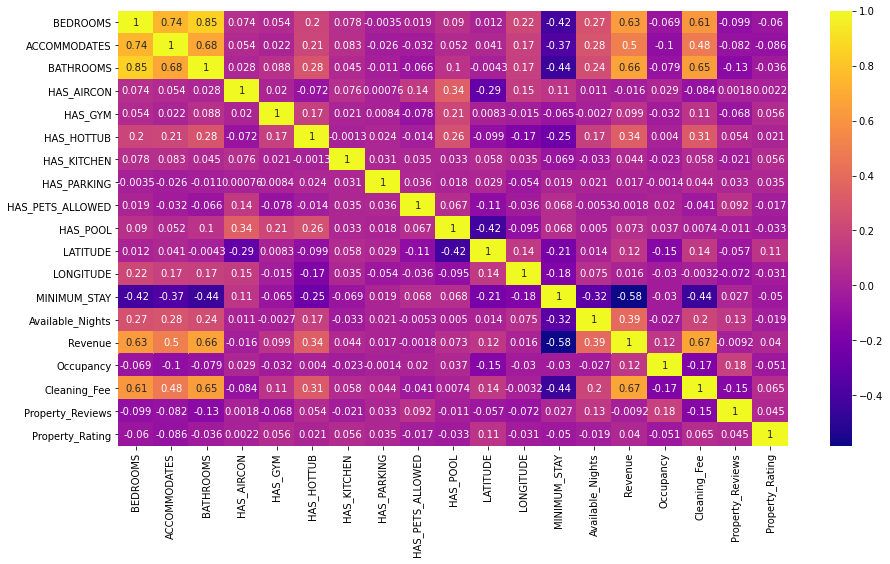

In [18]:
# Correlation analysis

fig, ax = plt.subplots(figsize=(15,8))

sns.heatmap(filtered_df.select_dtypes('number').corr(),annot=True,cmap='plasma');

#### Visualizing Predictors Versus Revenue.
In the following code snippet, I've developed a dropdown visualization tool that enables users to explore the relationship between various predictors and the target variable, revenue. This interactive feature allows for a comprehensive examination of how different features impact revenue, providing valuable insights for further analysis and modeling.

In [19]:
# Get the list of variables that share high correlation with revenue
high_corr_vars = [col for col in filtered_df.select_dtypes(include=['float64', 'int64']).columns 
                  if col != 'Revenue']

# Define a dropdown widget to select variables
variable_dropdown = widgets.Dropdown(options=high_corr_vars, description='Select Variable:')

# Define a function to update the plot based on the selected variable
def update_plot(selected_variable):
    plt.figure(figsize=(10, 6))
    if filtered_df[selected_variable].dtype == 'float64' or filtered_df[selected_variable].dtype == 'int64':
        sns.scatterplot(x=selected_variable, y='Revenue', data=filtered_df)
        plt.title(f'Scatter plot of {selected_variable} vs Revenue')
    elif filtered_df[selected_variable].dtype == 'object':
        sns.boxplot(x=selected_variable, y='Revenue', data=filtered_df)
        plt.title(f'Box plot of {selected_variable} vs Revenue')
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
    plt.xlabel(selected_variable)
    plt.ylabel('Revenue')
    plt.show()

# Display the dropdown widget and plot

widgets.interactive(update_plot, selected_variable=variable_dropdown)


interactive(children=(Dropdown(description='Select Variable:', options=('BEDROOMS', 'ACCOMMODATES', 'BATHROOMS…

## Preparing the Dataset

### Drop Unnessesary Columns
To prepare the dataset for machine learning models, irrelevant columns such as URLs, identifiers, and redundant categorical variables were dropped from the DataFrame 'filtered_df'. Next, the feature matrix 'X' was created by excluding the target variable `Revenue`, while the target vector 'y' was assigned the `Revenue` column.

In [20]:
filtered_df.drop(labels=['Airbnb_Host_URL', 'Airbnb_Listing_URL', 'Vrbo_Listing_URL', 'SUPERHOST', 
                        'INSTANT_BOOK', 'Property_ID', 'TITLE', 'Property_Manager/_Host_ID', 'BATHROOMS',
                        'HAS_AIRCON', 'Occupancy', 'Property_Reviews', 'Property_Rating', 'LATITUDE', 'LONGITUDE'], axis=1, inplace=True)

X= filtered_df.drop(labels=['Revenue'], axis=1)
y= filtered_df['Revenue']
X

,BEDROOMS,ACCOMMODATES,HAS_GYM,HAS_HOTTUB,HAS_KITCHEN,HAS_PARKING,HAS_PETS_ALLOWED,HAS_POOL,PRICE_TIER,STATE_NAME,MINIMUM_STAY,Available_Nights,Cleaning_Fee
0,5.0,12.0,1,1,1,1,0,1,5. Luxury,California,3.0,320,500.0
1,6.0,16.0,0,0,1,1,1,0,5. Luxury,New York,2.0,332,148.0
2,6.0,12.0,0,1,1,1,1,0,5. Luxury,Colorado,3.0,327,490.0
3,4.0,16.0,0,1,1,1,1,0,2. Economy,Utah,5.0,336,350.0
4,4.0,7.0,0,1,1,1,0,0,3. Midscale,Colorado,5.0,328,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9013,7.0,16.0,0,1,1,1,0,0,5. Luxury,California,30.0,204,700.0
9016,2.0,6.0,0,0,1,1,1,0,3. Midscale,Vermont,31.0,363,NaN
9021,3.0,6.0,0,0,1,1,1,0,3. Midscale,California,30.0,257,200.0
9026,6.0,12.0,0,0,1,1,1,0,5. Luxury,Massachusetts,7.0,235,300.0


In [21]:
X['PRICE_TIER'].value_counts()

5. Luxury      1336
4. Upscale      715
3. Midscale     469
2. Economy      322
1. Budget       228
Name: PRICE_TIER, dtype: int64

### Manually Map Price Tier
Additionally, the categorical variable `PRICE_TIER` was manually mapped to numerical values using a predefined dictionary, converting categorical data into numerical representations for model compatibility.

In [22]:
# Manual mapping
price_tier_mapping = {
    '1. Budget': 1,
    '2. Economy': 2,
    '3. Midscale': 3,
    '4. Upscale': 4,
    '5. Luxury': 5,
}

# Apply Mapping
X['PRICE_TIER'] = X['PRICE_TIER'].map(price_tier_mapping)
X['PRICE_TIER'].value_counts()

5    1336
4     715
3     469
2     322
1     228
Name: PRICE_TIER, dtype: int64

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3070 entries, 0 to 9035
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BEDROOMS          3070 non-null   float64
 1   ACCOMMODATES      3070 non-null   float64
 2   HAS_GYM           3070 non-null   int64  
 3   HAS_HOTTUB        3070 non-null   int64  
 4   HAS_KITCHEN       3070 non-null   int64  
 5   HAS_PARKING       3070 non-null   int64  
 6   HAS_PETS_ALLOWED  3070 non-null   int64  
 7   HAS_POOL          3070 non-null   int64  
 8   PRICE_TIER        3070 non-null   int64  
 9   STATE_NAME        3070 non-null   object 
 10  MINIMUM_STAY      3070 non-null   float64
 11  Available_Nights  3070 non-null   int64  
 12  Cleaning_Fee      2902 non-null   float64
dtypes: float64(4), int64(8), object(1)
memory usage: 335.8+ KB


### Train/Test Split

We split the dataset into training and testing sets using the train_test_split function from scikit-learn. This step is crucial for evaluating the model's performance on unseen data. The training set (usually 80% of the data) is used to train the model, while the testing set (remaining 20%) is used to assess how well the model generalizes to new data. Setting a random state ensures reproducibility of the split.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

### Constructing the Pipeline

We're setting up a pipeline to prepare our data for machine learning. In simple terms, we're getting our data ready so our computer model can understand it better. 

Here's what's happening:
- We have different kinds of data in our dataset. Some numbers, like prices, and some categories, like states.
- For numbers, we're filling in any missing values with the average (mean) of the other numbers and then scaling them so they're easier for the computer to work with.
- For categories, like states, we're filling in any missing ones with the most common state, then turning them into numbers using a technique called one-hot encoding. This just means turning each state into a bunch of numbers. 

The reason we're doing all this is to make sure our model can understand and learn from all the different types of information in our data.


In [25]:
# state_list = X['STATE_NAME'].unique().tolist()
state_counts = X['STATE_NAME'].value_counts()
state_list = state_counts.index.tolist()

numeric_pipeline = Pipeline([('numimputer', SimpleImputer(strategy = 'mean')), ('numnorm', StandardScaler())])

nominal_pipeline = Pipeline([
    ('onehotimputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehotenc', OneHotEncoder(sparse = False, drop = 'first', handle_unknown = 'ignore', categories=[state_list]))])



In [26]:
state_list

['California',
 'Colorado',
 'Nevada',
 'Tennessee',
 'Utah',
 'New York',
 'Montana',
 'North Carolina',
 'Massachusetts',
 'Arizona',
 'Wyoming',
 'Vermont',
 'Washington',
 'Pennsylvania',
 'Florida',
 'Missouri',
 'New Hampshire',
 'Idaho',
 'Georgia',
 'Oregon',
 'Maryland',
 'Maine',
 'Oklahoma',
 'New Mexico',
 'Texas',
 'South Carolina',
 'Arkansas',
 'West Virginia',
 'South Dakota']

In [27]:
num_cols = X_train.select_dtypes(['int64', 'float64']).columns

ct = ColumnTransformer(
    [("numpipe", numeric_pipeline, num_cols), 
     ("nominalpipe", nominal_pipeline, ['STATE_NAME'])])

num_cols

Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'MINIMUM_STAY', 'Available_Nights', 'Cleaning_Fee'],
      dtype='object')

In [28]:
ct

ColumnTransformer(transformers=[('numpipe',
                                 Pipeline(steps=[('numimputer',
                                                  SimpleImputer()),
                                                 ('numnorm',
                                                  StandardScaler())]),
                                 Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'MINIMUM_STAY', 'Available_Nights', 'Cleaning_Fee'],
      dtype='object')),
                                ('nominalpipe',
                                 Pipeline(steps=[('on...
                                                                             'Montana',
                                                                             'North '
                                                                             'Carolina',
                                                                             'Massachusetts',
                                                                             'Arizona',
                                                                             'Wyoming',
                                                                             'Vermont',
                                                                             'Washington',
                                                                             'Pennsylvania',
                                                                             'Florida',
                                                                             'Missouri',
                                                                             'New '
                                                                             'Hampshire',
                                                                             'Idaho',
                                                                             'Georgia',
                                                                             'Oregon',
                                                                             'Maryland',
                                                                             'Maine',
                                                                             'Oklahoma',
                                                                             'New '
                                                                             'Mexico',
                                                                             'Texas',
                                                                             'South '
                                                                             'Carolina',
                                                                             'Arkansas',
                                                                             'West '
                                                                             'Virginia',
                                                                             'South '
                                                                             'Dakota']],
                                                                drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['STATE_NAME'])])

In [29]:
X_train.columns

Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'STATE_NAME', 'MINIMUM_STAY', 'Available_Nights', 'Cleaning_Fee'],
      dtype='object')

### Model Evaluation Function
This function, `evaluate_model`, is a handy tool for testing different machine learning models. It takes a model, training and testing data, and a model name as inputs. Then, it fits the model to the training data, makes predictions on both the training and testing data, calculates several evaluation metrics such as RMSE, MAE, and R^2 for both training and testing sets, and stores these metrics in a global DataFrame for easy comparison.

Additionally, it generates visualizations to help understand the model's performance:
- The first plot shows the actual versus predicted revenue, with a red dashed line representing perfect predictions.
- The second plot is a residual plot, which helps to visualize the distribution of the errors between predicted and actual revenue.
- The third plot is a histogram of the residuals, showing the distribution of errors.

These visuals provide insights into how well the model is performing and whether there are any patterns or anomalies in the predictions.


In [30]:
# Global DataFrame to store evaluation results
all_metrics_df = pd.DataFrame(columns=['Model', 'Train RMSE', 'Test RMSE', 'Train MAE', 'Test MAE', 'Train R^2', 'Test R^2'])

def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    global all_metrics_df
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    train_rmse = round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4)
    test_rmse = round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4)
    train_mae = round(mean_absolute_error(y_train, y_train_pred), 4)
    test_mae = round(mean_absolute_error(y_test, y_test_pred), 4)
    train_r2 = round(model.score(X_train, y_train), 4)
    test_r2 = round(model.score(X_test, y_test), 4)
    
    # Store metrics in the global DataFrame
    model_metrics = pd.DataFrame({
        'Model': [model_name],
        'Train RMSE': [train_rmse],
        'Test RMSE': [test_rmse],
        'Train MAE': [train_mae],
        'Test MAE': [test_mae],
        'Train R^2': [train_r2],
        'Test R^2': [test_r2]
    })
    all_metrics_df = pd.concat([all_metrics_df, model_metrics], ignore_index=True)
    
    # Visualizations
    plot_evaluation_results(y_test, y_test_pred, model_name)
    
    # Return metrics for the current model
    return model_metrics

def plot_evaluation_results(y_test, y_test_pred, model_name):
    # Visualizations
    plt.figure(figsize=(12, 4))
    
    # Actual vs. predicted values
    plt.subplot(1, 3, 1)
    plt.scatter(y_test_pred, y_test)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
    plt.xlabel('Predicted Revenue')
    plt.ylabel('Actual Revenue')
    plt.title('Predicted vs. Actual Revenue (' + model_name + ')')
    
    # Residual plot
    plt.subplot(1, 3, 2)
    residuals = y_test - y_test_pred
    sns.residplot(y_test_pred, residuals, lowess=True, line_kws={'color': 'red'})
    plt.xlabel('Predicted Revenue')
    plt.ylabel('Residuals')
    plt.title('Residual Plot (' + model_name + ')')
    
    # Distribution plot of residuals
    plt.subplot(1, 3, 3)
    sns.histplot(residuals, kde=True)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('Distribution of Residuals (' + model_name + ')')
    
    plt.tight_layout()
    plt.show()


## Modeling

As we delve into the modeling process, our baseline model will be Linear Regression. However, we won't stop there. We'll explore the performance of various other regression models, including Ridge, Lasso, KNN, Decision Tree, Adaboost, XGBoost, Gradient Boosting, Elastic Net, Support Vector Regression, Stacking Regressor, and Voting Regressor. By testing a diverse range of models, we aim to identify the most suitable one for predicting revenue in our dataset.


### Linear Regression - Baseline Model

Linear Regression serves as an excellent baseline model due to its simplicity and interpretability. It provides a straightforward understanding of the relationship between independent variables and the target variable. Additionally, it establishes a benchmark for evaluating more complex models, helping us assess whether more sophisticated techniques offer significant improvements over this basic approach. Its ease of implementation and computational efficiency make it an ideal starting point for our modeling process.

In [31]:
# Create a pipeline consisting of data preprocessing steps and a linear regression model
final_pipe = Pipeline([('preprocess', ct),
                      ('model',
                       LinearRegression())])
# Display the pipeline
final_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer()),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'MINIMUM_STAY', 'Available_Nights', 'Cleaning_Fee'],
      dtype='object')),
                                                 ('nom...
                                                                                              'Massachusetts',
                                                                                              'Arizona',
                                                                                              'Wyoming',
                                                                                              'Vermont',
                                                                                              'Washington',
                                                                                              'Pennsylvania',
                                                                                              'Florida',
                                                                                              'Missouri',
                                                                                              'New '
                                                                                              'Hampshire',
                                                                                              'Idaho',
                                                                                              'Georgia',
                                                                                              'Oregon',
                                                                                              'Maryland',
                                                                                              'Maine',
                                                                                              'Oklahoma',
                                                                                              'New '
                                                                                              'Mexico',
                                                                                              'Texas',
                                                                                              'South '
                                                                                              'Carolina',
                                                                                              'Arkansas',
                                                                                              'West '
                                                                                              'Virginia',
                                                                                              'South '
                                                                                              'Dakota']],
                                                                                 drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['STATE_NAME'])])),
                ('model', LinearRegression())])

The baseline linear regression model achieves an R-squared of approximately 0.6873 on the training set and 0.6933 on the test set. This indicates that the model explains about 68.73% of the variance in the training data and 69.33% of the variance in the test data.

In [32]:
# Fit the final pipeline on the training data
final_pipe.fit(X_train, y_train)

# Print the R-squared scores for the baseline linear regression model on the training and test sets
print(f'Baseline Train Rsquared: {round(final_pipe.score(X_train, y_train),4)}')
print(f'Baseline Test Rsquared: {round(final_pipe.score(X_test, y_test),4)}')

Baseline Train Rsquared: 0.6873
Baseline Test Rsquared: 0.6933


In [33]:
# Retrieve the trained linear regression model from the final pipeline
linear_regression_model = final_pipe.named_steps['model']

# Extract the coefficients of the features from the trained model
coefficients = linear_regression_model.coef_

Summary:

- The key predictors affecting revenue include the number of bedrooms, accommodates, availability of amenities like a hot tub, gym, pool, and kitchen, along with factors like price tier and cleaning fee.
- States like California (dropped during one-hot encoding), Massachusetts, New York, and Florida have notable impacts on revenue, as evidenced by their coefficients.
- The intercept value indicates the base revenue when all predictors are zero. In this case, it's approximately $229,821.64.

In [34]:
# Define numeric features as those columns with data types 'int64' or 'float64'
num_features = num_cols  

# Create a dictionary containing categorical feature information
# Key: Name of the categorical feature
# Value: List of unique categories in the feature
cat_features_info = {
    'STATE_NAME': state_list
}

transformed_feature_names = []  # Initialize an empty list for all feature names post-transformation

# Add numeric feature names directly, as they are unchanged
transformed_feature_names.extend(num_features)

# Manually construct feature names for the one-hot encoded categorical features, excluding the first category
for feature, categories in cat_features_info.items():
    # Iterate over categories starting from the second one (index 1) if the first category is dropped
    for category in categories[1:]:
        transformed_feature_names.append(f"{feature}_{category}")

In [35]:
# Ensure 'transformed_feature_names' and 'coefficients' are correctly defined as above
for predictor, coef in zip(transformed_feature_names, coefficients):
    print(f'Predictor: {predictor}, Coefficient: {coef}')

Predictor: BEDROOMS, Coefficient: 46358.76048062563
Predictor: ACCOMMODATES, Coefficient: -2717.878985982592
Predictor: HAS_GYM, Coefficient: 3992.1712084410065
Predictor: HAS_HOTTUB, Coefficient: 6627.170835234008
Predictor: HAS_KITCHEN, Coefficient: -3472.8672252361685
Predictor: HAS_PARKING, Coefficient: 336.65354564887804
Predictor: HAS_PETS_ALLOWED, Coefficient: -161.51913744711675
Predictor: HAS_POOL, Coefficient: 3684.169102208071
Predictor: PRICE_TIER, Coefficient: 32757.232739914063
Predictor: MINIMUM_STAY, Coefficient: -32074.747147785303
Predictor: Available_Nights, Coefficient: 22590.987778449697
Predictor: Cleaning_Fee, Coefficient: 37525.36042222277
Predictor: STATE_NAME_Colorado, Coefficient: -5094.0736091993
Predictor: STATE_NAME_Nevada, Coefficient: -16140.373414576912
Predictor: STATE_NAME_Tennessee, Coefficient: -48567.159555367616
Predictor: STATE_NAME_Utah, Coefficient: -16935.081247921757
Predictor: STATE_NAME_New York, Coefficient: -35094.22646585925
Predictor: S

In [36]:
# Retrieve the linear regression model from the pipeline
linear_regression_model = final_pipe.named_steps['model']

# Get the intercept of the linear regression model
intercept = linear_regression_model.intercept_

# Print the intercept value
print(f'Intercept: {intercept}')

Intercept: 229821.63827306344


#### Hyperparamater Tuning with GridSearchCV

We utilize GridSearchCV, a technique for systematically searching for the best combination of hyperparameters that optimize a model's performance. Here, we're applying it to our pipeline, which includes preprocessing steps and a linear regression model.

The grid search explores different combinations of hyperparameters, evaluating each combination using cross-validation. The 'model__fit_intercept' parameter controls whether the linear regression model includes an intercept term, while 'preprocess__numpipe__numimputer__strategy' determines the strategy for imputing missing numeric values.

The best cross-validation score achieved is 0.674, indicating the average performance of the model across various parameter combinations. The best parameters found during the search are {'model__fit_intercept': True, 'preprocess__numpipe__numimputer__strategy': 'mean'}, suggesting that including the intercept term and imputing missing numeric values with the mean strategy resulted in the highest performance.


In [37]:
# Define the grid of hyperparameters for the pipeline
final_pipe_grid = {
    'preprocess__numpipe__numimputer__strategy': ["mean", "median"],  # Strategies for imputing missing numeric values
    'model__fit_intercept': [True, False]  # Whether to fit the intercept for the linear regression model
}

# Instantiate the grid search cross-validation object with the pipeline and parameter grid
gs_lr_full_pipe = GridSearchCV(estimator=final_pipe, param_grid=final_pipe_grid, cv=5)

# Fit the grid search object to the training data
gs_lr_full_pipe.fit(X_train, y_train)

# Print the best cross-validation score obtained during the grid search
print(f'Best GS Score: {round(gs_lr_full_pipe.best_score_, 4)}')

# Print the best parameters found during the grid search
print(f'Best Parameters: {gs_lr_full_pipe.best_params_}')

# Get the best model estimator based on the grid search results
best_lr_model = gs_lr_full_pipe.best_estimator_

Best GS Score: 0.674
Best Parameters: {'model__fit_intercept': True, 'preprocess__numpipe__numimputer__strategy': 'mean'}


#### Results

The Linear Regression model exhibits relatively high RMSE (Root Mean Squared Error) values on both the training and test datasets. RMSE measures the average magnitude of the errors between predicted and actual values, with lower values indicating better model performance. In this case, the test RMSE (79,516.28) is slightly lower than the training RMSE (83,545.67), suggesting that the model generalizes reasonably well to unseen data but still has room for improvement.

Similarly, the MAE (Mean Absolute Error) values are also high, indicating the average absolute difference between predicted and actual revenue values. The test MAE (61,672.21) is slightly lower than the training MAE (61,888.49), which aligns with the observation from RMSE and suggests moderate overfitting, although the difference is not substantial.

The $R^2$ (coefficient of determination) values indicate the proportion of the variance in the dependent variable (revenue) that is predictable from the independent variables. A value closer to 1 indicates a better fit. Both the training and test $R^2$ values are moderate (0.6873 and 0.6933, respectively), suggesting that the model explains a moderate amount of the variance in revenue, but there is still room for improvement.

Overall, while the Linear Regression model provides a reasonable baseline, there is potential for improvement in reducing prediction errors and enhancing the model's ability to explain revenue variance.

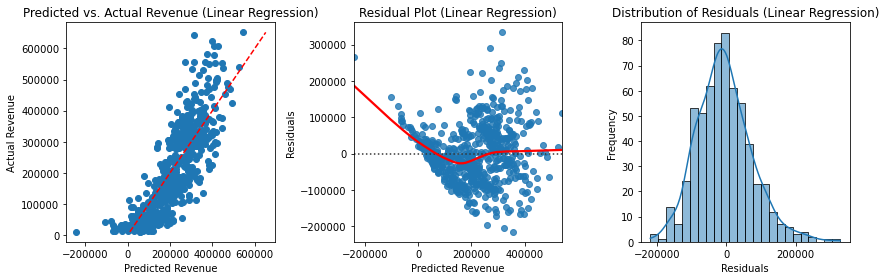

,Model,Train RMSE,Test RMSE,Train MAE,Test MAE,Train R^2,Test R^2
0,Linear Regression,83545.6686,79516.2759,61888.486,61672.2107,0.6873,0.6933


In [38]:
evaluate_model(best_lr_model, X_train, y_train, X_test, y_test, 'Linear Regression')

### Ridge Regression

Ridge regression is a linear regression technique that incorporates regularization in the form of an L2 penalty term added to the cost function. This penalty term helps to shrink the coefficients towards zero, which can mitigate overfitting by reducing the complexity of the model. Essentially, Ridge regression adds a penalty term to the ordinary least squares (OLS) method, which helps to improve the model's generalization performance by reducing the variance in the estimates of the coefficients.

In [39]:
# Replace the last step (model) in the pipeline with Ridge regression
final_pipe.steps[-1] = ('model', Ridge(random_state=42))

# Display the updated pipeline
final_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer()),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'MINIMUM_STAY', 'Available_Nights', 'Cleaning_Fee'],
      dtype='object')),
                                                 ('nom...
                                                                                              'Massachusetts',
                                                                                              'Arizona',
                                                                                              'Wyoming',
                                                                                              'Vermont',
                                                                                              'Washington',
                                                                                              'Pennsylvania',
                                                                                              'Florida',
                                                                                              'Missouri',
                                                                                              'New '
                                                                                              'Hampshire',
                                                                                              'Idaho',
                                                                                              'Georgia',
                                                                                              'Oregon',
                                                                                              'Maryland',
                                                                                              'Maine',
                                                                                              'Oklahoma',
                                                                                              'New '
                                                                                              'Mexico',
                                                                                              'Texas',
                                                                                              'South '
                                                                                              'Carolina',
                                                                                              'Arkansas',
                                                                                              'West '
                                                                                              'Virginia',
                                                                                              'South '
                                                                                              'Dakota']],
                                                                                 drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['STATE_NAME'])])),
                ('model', Ridge(random_state=42))])

These initial results suggest that the model performs similarly on both the training and test datasets, with a slightly higher R-squared value on the test dataset compared to the training dataset. This indicates that the model is not overfitting to the training data, but rather generalizes reasonably well to unseen data.

In [40]:
# Fit the final pipeline on the training data
final_pipe.fit(X_train, y_train)

# Print the R-squared scores for the model on the training and test sets
print(f'Baseline Train Rsquared: {round(final_pipe.score(X_train, y_train),4)}')
print(f'Baseline Test Rsquared: {round(final_pipe.score(X_test, y_test),4)}')

Baseline Train Rsquared: 0.687
Baseline Test Rsquared: 0.6933


#### Hyperparamater Tuning with GridSearchCV
The grid search with cross-validation yielded a best mean cross-validation score of approximately 0.6748. The best parameters obtained from the grid search are as follows:

- Regularization strength (alpha): 3.2
- Solver for optimization: Auto
- Imputation strategy for missing numeric values: Mean
- Random state: 42

These parameters were found to optimize the performance of the Ridge regression model within the pipeline.


In [41]:
# Define the grid of hyperparameters for the Ridge regression pipeline
final_pipe_grid_r = {
    'preprocess__numpipe__numimputer__strategy': ["mean", "median"],  # Strategies for imputing missing numeric values
    'model__alpha': [0.1, 0.2, 0.4, 0.5, 0.8, 1.0, 1.6, 2.0, 3.2, 4.0, 6.0, 8.0, 10.0],  # Regularization strength
    'model__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],  # Solver for optimization
    'model__random_state': [42]  # Random state for reproducibility
}

# Instantiate the GridSearchCV object with the pipeline and parameter grid
gs_full_pipe_r = GridSearchCV(estimator=final_pipe, param_grid=final_pipe_grid_r, cv=5)

# Fit the GridSearchCV object to the training data
gs_full_pipe_r.fit(X_train, y_train)

# Print the best cross-validation score obtained during the grid search
print(f'Best GS Score: {round(gs_full_pipe_r.best_score_, 4)}')

# Print the best parameters found during the grid search
print(f'Best Parameters: {gs_full_pipe_r.best_params_}')

# Get the best model estimator based on the grid search results
best_r_model = gs_full_pipe_r.best_estimator_

Best GS Score: 0.6748
Best Parameters: {'model__alpha': 3.2, 'model__random_state': 42, 'model__solver': 'auto', 'preprocess__numpipe__numimputer__strategy': 'mean'}


#### Results

The Ridge Regression model, when trained on the training data, yielded a root mean squared error (RMSE) of approximately 83,687 and a mean absolute error (MAE) of around 62,063. The model explained approximately 68.63% of the variance in the training data (Train R^2). When applied to the test data, the model achieved a RMSE of about 79,609 and a MAE of roughly 61,603, indicating similar performance to the training data. The test $R^2$ score suggests that the model explains around 69.26% of the variance in the test data. Overall, the model appears to perform similarly to the baseline Linear Regression model.

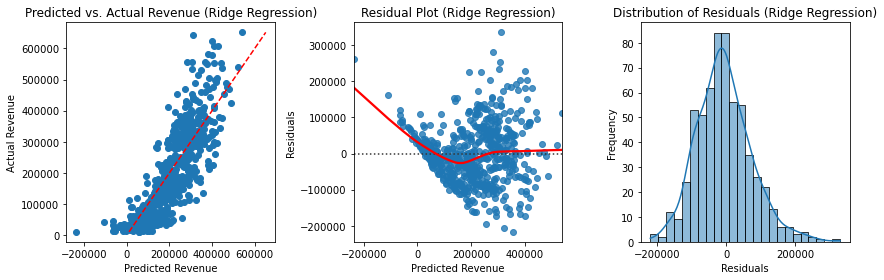

,Model,Train RMSE,Test RMSE,Train MAE,Test MAE,Train R^2,Test R^2
0,Ridge Regression,83686.9855,79608.6407,62062.8609,61602.7549,0.6863,0.6926


In [42]:
# Evaluate the Ridge regression model using the evaluate_model function
# Parameters:
# - best_r_model: The best Ridge regression model obtained from grid search
# - X_train, y_train: Training features and target
# - X_test, y_test: Test features and target
# - 'Ridge Regression': Name of the model for identification in evaluation
evaluate_model(best_r_model, X_train, y_train, X_test, y_test, 'Ridge Regression')

### Lasso

Lasso regression, also known as L1 regularization, is a linear regression technique that adds a penalty term to the ordinary least squares (OLS) cost function. This penalty term is proportional to the absolute value of the coefficients of the features, forcing some coefficients to be exactly zero. As a result, Lasso regression performs feature selection by shrinking the coefficients of less important features to zero, effectively removing them from the model. This helps to simplify the model and prevent overfitting, particularly in situations with a large number of features. The degree of regularization is controlled by a hyperparameter called alpha, which determines the strength of the penalty term. Lasso regression is useful for creating parsimonious models with a subset of relevant features.

In [43]:
# Replace the last step of the pipeline with Lasso regression model
final_pipe.steps[-1] = ('model', Lasso(random_state=42, max_iter=1000))

# Display the pipeline
final_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer()),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'MINIMUM_STAY', 'Available_Nights', 'Cleaning_Fee'],
      dtype='object')),
                                                 ('nom...
                                                                                              'Massachusetts',
                                                                                              'Arizona',
                                                                                              'Wyoming',
                                                                                              'Vermont',
                                                                                              'Washington',
                                                                                              'Pennsylvania',
                                                                                              'Florida',
                                                                                              'Missouri',
                                                                                              'New '
                                                                                              'Hampshire',
                                                                                              'Idaho',
                                                                                              'Georgia',
                                                                                              'Oregon',
                                                                                              'Maryland',
                                                                                              'Maine',
                                                                                              'Oklahoma',
                                                                                              'New '
                                                                                              'Mexico',
                                                                                              'Texas',
                                                                                              'South '
                                                                                              'Carolina',
                                                                                              'Arkansas',
                                                                                              'West '
                                                                                              'Virginia',
                                                                                              'South '
                                                                                              'Dakota']],
                                                                                 drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['STATE_NAME'])])),
                ('model', Lasso(random_state=42))])

The baseline model, utilizing Lasso regression, achieved an R^2 score of approximately 0.6873 on the training data and 0.6933 on the test data. This suggests that the model's performance on the test data is consistent with its performance on the training data.


In [44]:
# Fit the final pipeline on the training data
final_pipe.fit(X_train, y_train)

# Print the R-squared scores for the model on the training and test sets
print(f'Baseline Train Rsquared: {round(final_pipe.score(X_train, y_train),4)}')
print(f'Baseline Test Rsquared: {round(final_pipe.score(X_test, y_test),4)}')

Baseline Train Rsquared: 0.6873
Baseline Test Rsquared: 0.6933


#### Hyperparamater Tuning with GridSearchCV

The grid search cross-validation was performed to optimize the Lasso regression model. The best cross-validation score obtained during the grid search was 0.674. The best parameters found were:
- Regularization strength (alpha): 2.0
- Maximum number of iterations: 500
- Random state for reproducibility: 42
- Strategy for imputing missing numeric values: Mean


In [45]:
# Define the grid of hyperparameters for Lasso regression
final_pipe_grid_l = {
    'preprocess__numpipe__numimputer__strategy': ["mean", "median"],  # Strategies for imputing missing numeric values
    'model__alpha': [0.1, 0.2, 0.4, 0.5, 0.6, 0.8, 1.0, 1.5, 2.0],  # Regularization strength
    'model__max_iter': [500, 1000, 1500, 2000, 2500],  # Maximum number of iterations
    'model__random_state': [42]  # Random state for reproducibility
}

# Perform GridSearchCV with the pipeline
gs_full_pipe_l = GridSearchCV(estimator=final_pipe, param_grid=final_pipe_grid_l, cv=5)
gs_full_pipe_l.fit(X_train, y_train)

# Print the best cross-validation score obtained during the grid search
print(f'Best GS Score: {round(gs_full_pipe_l.best_score_, 4)}')

# Print the best parameters found during the grid search
print(f'Best Parameters: {gs_full_pipe_l.best_params_}')

# Get the best model estimator based on the grid search results
best_l_model = gs_full_pipe_l.best_estimator_

Best GS Score: 0.674
Best Parameters: {'model__alpha': 2.0, 'model__max_iter': 500, 'model__random_state': 42, 'preprocess__numpipe__numimputer__strategy': 'mean'}


#### Results

These results indicate that the Lasso Regression model performs similarly to the baseline Linear Regression model in terms of test RMSE and $R^2$ score. The model is able to explain approximately 69.34% of the variance in the test data. RMSE measures the average magnitude of the errors between predicted and actual values, while MAE represents the average absolute error. The closeness of the train and test RMSE and MAE values suggests that the model is not overfitting or underfitting significantly.

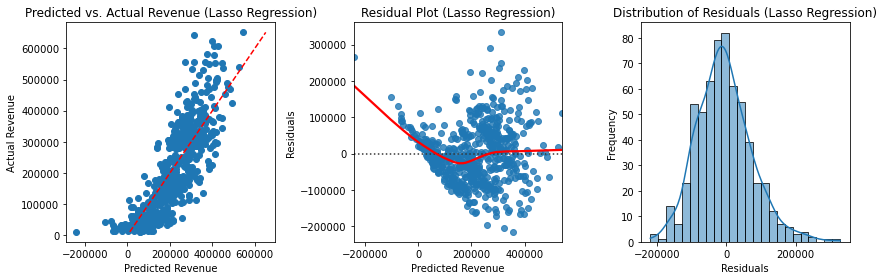

,Model,Train RMSE,Test RMSE,Train MAE,Test MAE,Train R^2,Test R^2
0,Lasso Regression,83545.8857,79513.7192,61891.9644,61667.7067,0.6873,0.6934


In [46]:
# Evaluate the Lasso Regression model using the evaluate_model function
# Parameters:
# - best_l_model: Best Lasso Regression model obtained from grid search
# - X_train, y_train: Training features and target
# - X_test, y_test: Test features and target
# - 'Lasso Regression': Model name
evaluate_model(best_l_model, X_train, y_train, X_test, y_test, 'Lasso Regression')

### KNeighbors Regressor

KNeighbors Regressor is a type of supervised learning algorithm used for regression tasks. It works by predicting the target variable for a new data point based on the average of the target values of its k-nearest neighbors in the training set. The number of neighbors (k) and the distance metric used are hyperparameters that can be tuned to optimize performance.

In [47]:
# Update the last step of the pipeline to use KNeighborsRegressor as the model
final_pipe.steps[-1] = ('model', KNeighborsRegressor())
final_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer()),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'MINIMUM_STAY', 'Available_Nights', 'Cleaning_Fee'],
      dtype='object')),
                                                 ('nom...
                                                                                              'Massachusetts',
                                                                                              'Arizona',
                                                                                              'Wyoming',
                                                                                              'Vermont',
                                                                                              'Washington',
                                                                                              'Pennsylvania',
                                                                                              'Florida',
                                                                                              'Missouri',
                                                                                              'New '
                                                                                              'Hampshire',
                                                                                              'Idaho',
                                                                                              'Georgia',
                                                                                              'Oregon',
                                                                                              'Maryland',
                                                                                              'Maine',
                                                                                              'Oklahoma',
                                                                                              'New '
                                                                                              'Mexico',
                                                                                              'Texas',
                                                                                              'South '
                                                                                              'Carolina',
                                                                                              'Arkansas',
                                                                                              'West '
                                                                                              'Virginia',
                                                                                              'South '
                                                                                              'Dakota']],
                                                                                 drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['STATE_NAME'])])),
                ('model', KNeighborsRegressor())])

The KNeighborsRegressor model exhibits promising performance out of the box, with a higher R-squared value on the training set (0.7603) compared to the test set (0.6418). This suggests that the model may be overfitting the training data to some extent, as indicated by the relatively large difference between the training and test R-squared values.

In [48]:
# Fit the final pipeline on the training data
final_pipe.fit(X_train, y_train)

# Print the R-squared scores for the model on the training and test sets
print(f'Baseline Train Rsquared: {round(final_pipe.score(X_train, y_train),4)}')
print(f'Baseline Test Rsquared: {round(final_pipe.score(X_test, y_test),4)}')

Baseline Train Rsquared: 0.7603
Baseline Test Rsquared: 0.6418


#### Hyperparamater Tuning with GridSearchCV

The GridSearchCV process for the KNeighborsRegressor model yielded promising results. The best cross-validation score obtained was 0.6983, indicating that the model performs reasonably well on unseen data. 

The optimal hyperparameters determined by the grid search are as follows:
- Imputation strategy for missing numeric values: Median
- Number of neighbors: 16
- Weight function: Distance
- Algorithm: Ball Tree
- Leaf size: 35
- Power parameter for the Minkowski metric: 1 (Manhattan distance)

These parameters are selected to enhance the model's performance based on the provided dataset and features.

In [49]:
# Define the grid of hyperparameters for the KNeighborsRegressor model within the pipeline
final_pipe_grid_knn = {
    'preprocess__numpipe__numimputer__strategy': ["mean", "median"],  # Strategies for imputing missing numeric values
    'model__n_neighbors': [10, 12, 14, 16, 18, 20],  # Number of neighbors to consider
    'model__weights': ['uniform', 'distance'],  # Weight function used in prediction
    'model__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used to compute the nearest neighbors
    'model__leaf_size': [10, 15, 20, 25, 30, 35],  # Leaf size passed to BallTree or KDTree
    'model__p': [1, 2]  # Power parameter for the Minkowski metric
}

# Perform GridSearchCV with the pipeline
gs_full_pipe_knn = GridSearchCV(estimator=final_pipe, param_grid=final_pipe_grid_knn, cv=5)
gs_full_pipe_knn.fit(X_train, y_train)

# Print the best cross-validation score obtained during the grid search
print(f'Best GS Score: {round(gs_full_pipe_knn.best_score_, 4)}')

# Print the best parameters found during the grid search
print(f'Best Parameters: {gs_full_pipe_knn.best_params_}')

# Get the best model estimator based on the grid search results
best_knn_model = gs_full_pipe_knn.best_estimator_

Best GS Score: 0.6983
Best Parameters: {'model__algorithm': 'ball_tree', 'model__leaf_size': 35, 'model__n_neighbors': 16, 'model__p': 1, 'model__weights': 'distance', 'preprocess__numpipe__numimputer__strategy': 'median'}


#### Results

The KNeighbors Regression model achieved a very low Train RMSE of 474.8732, indicating a good fit to the training data. However, the Test RMSE is significantly higher at 78556.6315, suggesting that the model may be overfitting to some extent. The Train MAE is low at 21.9353, indicating that, on average, the model's predictions are off by this amount on the training data. The Test MAE is much higher at 57644.6915, indicating larger prediction errors on the test data. The Train $R^2$ value of 1.0 indicates a perfect fit to the training data, while the Test $R^2$ of 0.7007 suggests that the model explains approximately 70.07% of the variance in the test data. Overall, the KNeighbors Regression model performs reasonably well but may benefit from further tuning to improve generalization to unseen data.

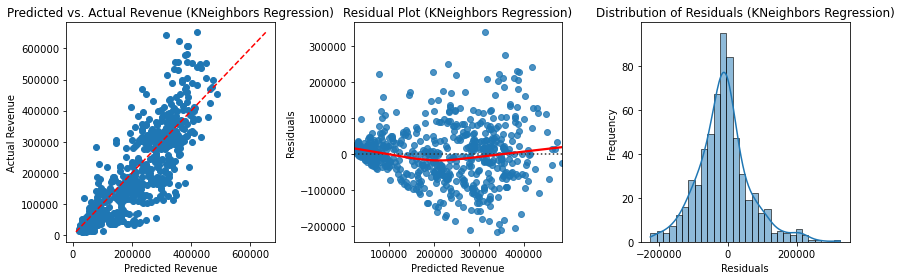

,Model,Train RMSE,Test RMSE,Train MAE,Test MAE,Train R^2,Test R^2
0,KNeighbors Regression,474.8732,78556.6315,21.9353,57644.6915,1.0,0.7007


In [50]:
# Evaluate the KNeighbors Regression model using the evaluate_model function
evaluate_model(best_knn_model, X_train, y_train, X_test, y_test, 'KNeighbors Regression')

### Decision Tree Regressor

The Decision Tree Regressor is a non-parametric supervised learning algorithm used for both classification and regression tasks. In the context of regression, it works by recursively partitioning the feature space into smaller regions based on the feature values. At each node of the tree, the algorithm selects the feature that best splits the data, typically using metrics like mean squared error (MSE) or mean absolute error (MAE), to minimize the impurity or increase in homogeneity within each partition. This process continues until a stopping criterion is met, such as reaching a maximum tree depth, minimum number of samples per leaf, or when further splits do not lead to significant improvement in the chosen criterion. Once the tree is constructed, predictions for new data points are made by traversing the tree from the root node to a leaf node and outputting the average or majority target value of the training samples in that leaf node. Overall, decision trees are intuitive, easy to interpret, and can capture non-linear relationships in the data, but they are prone to overfitting, especially with deep trees. Regularization techniques like pruning or ensemble methods like Random Forests can help mitigate this issue.

In [51]:
# Replace the last step of the pipeline with DecisionTreeRegressor
final_pipe.steps[-1] = ('model', DecisionTreeRegressor(random_state=42))
final_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer()),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'MINIMUM_STAY', 'Available_Nights', 'Cleaning_Fee'],
      dtype='object')),
                                                 ('nom...
                                                                                              'Wyoming',
                                                                                              'Vermont',
                                                                                              'Washington',
                                                                                              'Pennsylvania',
                                                                                              'Florida',
                                                                                              'Missouri',
                                                                                              'New '
                                                                                              'Hampshire',
                                                                                              'Idaho',
                                                                                              'Georgia',
                                                                                              'Oregon',
                                                                                              'Maryland',
                                                                                              'Maine',
                                                                                              'Oklahoma',
                                                                                              'New '
                                                                                              'Mexico',
                                                                                              'Texas',
                                                                                              'South '
                                                                                              'Carolina',
                                                                                              'Arkansas',
                                                                                              'West '
                                                                                              'Virginia',
                                                                                              'South '
                                                                                              'Dakota']],
                                                                                 drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['STATE_NAME'])])),
                ('model', DecisionTreeRegressor(random_state=42))])

The Decision Tree Regressor achieved a perfect $R^2$ score of 1.0 on the training data, indicating that it perfectly fits the training data. However, on the test data, the $R^2$ score dropped to 0.6207, suggesting that the model may be overfitting the training data. This discrepancy between the training and test R^2 scores indicates potential overfitting, which needs to be addressed during model optimization.

In [52]:
# Fit the final pipeline on the training data
final_pipe.fit(X_train, y_train)

# Print the R-squared scores for the model on the training and test sets
print(f'Baseline Train Rsquared: {round(final_pipe.score(X_train, y_train),4)}')
print(f'Baseline Test Rsquared: {round(final_pipe.score(X_test, y_test),4)}')

Baseline Train Rsquared: 1.0
Baseline Test Rsquared: 0.6207


#### Hyperparamater Tuning with GridSearchCV

The grid search cross-validation for the Decision Tree Regressor yielded a best score of 0.741. This score represents the average performance of the model across different parameter combinations during cross-validation. 

The best parameters identified by the grid search are as follows:
- **Criterion**: squared_error: This criterion measures the quality of a split based on the mean squared error.
- **Max Depth**: 6: The maximum depth of the tree is limited to 6 levels, controlling the maximum number of nodes in the tree.
- **Max Features**: auto: The number of features to consider when looking for the best split is set to auto, meaning it considers all features.
- **Min Samples Leaf**: 10: The minimum number of samples required to be at a leaf node is set to 10, controlling the complexity of the tree.
- **Min Samples Split**: 2: The minimum number of samples required to split an internal node is set to 2, ensuring each node has enough data to make a decision.
- **Random State**: 42: This parameter ensures reproducibility by fixing the random seed.
- **Splitter**: best: This specifies the strategy used to choose the split at each node, with 'best' indicating the best split.
- **Numeric Imputer Strategy**: mean: For imputing missing numeric values, the mean strategy is selected, which replaces missing values with the mean of the non-missing values.

These parameters collectively optimize the decision tree model's performance, balancing complexity and predictive accuracy.

In [53]:
# Define the grid of hyperparameters for the Decision Tree Regressor pipeline
final_pipe_grid_dt = {
    'preprocess__numpipe__numimputer__strategy': ["mean", "median"],  # Strategies for imputing missing numeric values
    'model__criterion': ["squared_error", "friedman_mse", "absolute_error", "poisson"],  # Criterion for quality of split
    'model__splitter': ['best', 'random'],  # Strategy for splitting nodes
    'model__max_depth': [None, 2, 4, 6, 8, 10],  # Maximum depth of the tree
    'model__min_samples_split': [2, 4, 6, 8, 10],  # Minimum number of samples required to split an internal node
    'model__min_samples_leaf': [2, 4, 6, 8, 10],  # Minimum number of samples required to be a leaf node
    'model__max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'model__random_state': [42]  # Random state for reproducibility
}

# Perform GridSearchCV with the pipeline
gs_full_pipe_dt = GridSearchCV(estimator=final_pipe, param_grid=final_pipe_grid_dt, cv=5)
gs_full_pipe_dt.fit(X_train, y_train)

# Print the best cross-validation score obtained during the grid search
print(f'Best GS Score: {round(gs_full_pipe_dt.best_score_, 4)}')

# Print the best parameters found during the grid search
print(f'Best Parameters: {gs_full_pipe_dt.best_params_}')

# Get the best model estimator based on the grid search results
best_dt_model = gs_full_pipe_dt.best_estimator_

Best GS Score: 0.741
Best Parameters: {'model__criterion': 'squared_error', 'model__max_depth': 6, 'model__max_features': 'auto', 'model__min_samples_leaf': 10, 'model__min_samples_split': 2, 'model__random_state': 42, 'model__splitter': 'best', 'preprocess__numpipe__numimputer__strategy': 'mean'}


#### Results

The Decision Tree Regression model achieved a Train RMSE of 67132.2759 and a Test RMSE of 66327.0158. RMSE (Root Mean Squared Error) measures the average deviation of the predicted values from the actual values. A lower RMSE indicates better model performance, and in this case, the model's performance on the test data is slightly better than on the training data, which suggests that the model is not overfitting.

The Train MAE (Mean Absolute Error) is 46220.7472, and the Test MAE is 47110.5129. MAE measures the average absolute difference between the predicted and actual values. Similar to RMSE, a lower MAE indicates better model performance. In this case, the MAE values are relatively high, indicating that the model's predictions are, on average, off by around 46,000 to 47,000.

The Train $R^2$ is 0.7981, and the Test $R^2$ is 0.7866. R-squared represents the proportion of the variance in the dependent variable (revenue) that is predictable from the independent variables. A higher R-squared value indicates a better fit of the model to the data. In this case, both the training and test R-squared values are relatively high, indicating that the model explains a significant portion of the variance in the revenue data.

Overall, the Decision Tree Regression model performs reasonably well, and performs competitively compared to the other models we have tested so far, with relatively low RMSE and MAE values and high R-squared values on both the training and test datasets.



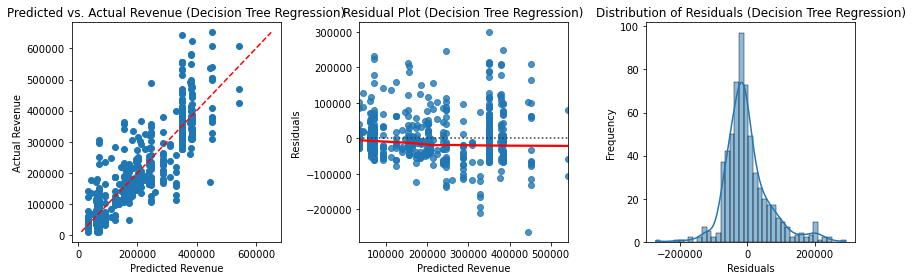

,Model,Train RMSE,Test RMSE,Train MAE,Test MAE,Train R^2,Test R^2
0,Decision Tree Regression,67132.2759,66327.0158,46220.7472,47110.5129,0.7981,0.7866


In [54]:
evaluate_model(best_dt_model, X_train, y_train, X_test, y_test, 'Decision Tree Regression')

### AdaBoost Regressor

AdaBoost, short for Adaptive Boosting, is a boosting ensemble technique that combines multiple weak learners (typically decision trees) to create a strong learner. It works by sequentially fitting the weak learners to the data, with each subsequent learner focusing more on the instances that the previous ones misclassified. 

Here's how AdaBoost works:
1. It starts by fitting a weak learner to the original dataset.
2. It then assigns higher weights to the misclassified instances so that they have a higher probability of being selected in the next round.
3. The process is repeated sequentially, with each subsequent weak learner adjusting its focus based on the errors made by the previous ones.
4. Finally, the predictions from all the weak learners are combined through a weighted sum to produce the final prediction.

This iterative process allows AdaBoost to improve its performance with each subsequent weak learner added to the ensemble.


In [55]:
# Set the final step of the pipeline to AdaBoostRegressor with DecisionTreeRegressor as the base estimator
final_pipe.steps[-1] = ('model', 
                        AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=42),
                                          random_state=42))

# Output the pipeline
final_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer()),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'MINIMUM_STAY', 'Available_Nights', 'Cleaning_Fee'],
      dtype='object')),
                                                 ('nom...
                                                                                              'Florida',
                                                                                              'Missouri',
                                                                                              'New '
                                                                                              'Hampshire',
                                                                                              'Idaho',
                                                                                              'Georgia',
                                                                                              'Oregon',
                                                                                              'Maryland',
                                                                                              'Maine',
                                                                                              'Oklahoma',
                                                                                              'New '
                                                                                              'Mexico',
                                                                                              'Texas',
                                                                                              'South '
                                                                                              'Carolina',
                                                                                              'Arkansas',
                                                                                              'West '
                                                                                              'Virginia',
                                                                                              'South '
                                                                                              'Dakota']],
                                                                                 drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['STATE_NAME'])])),
                ('model',
                 AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=42),
                                   random_state=42))])

The baseline train $R^2$ for the ADAboost regressor model is exceptionally high at 0.9988, indicating a nearly perfect fit to the training data. However, the baseline test $R^2$ is 0.7953, which suggests some degree of overfitting since it's considerably higher than the train $R^2$. Further evaluation and tuning of the model are necessary to address overfitting.


In [56]:
# Fit the final pipeline on the training data
final_pipe.fit(X_train, y_train)

# Print the R-squared scores for the model on the training and test sets
print(f'Baseline Train Rsquared: {round(final_pipe.score(X_train, y_train),4)}')
print(f'Baseline Test Rsquared: {round(final_pipe.score(X_test, y_test),4)}')

Baseline Train Rsquared: 0.9988
Baseline Test Rsquared: 0.7953


#### Hyperparamater Tuning with GridSearchCV

The ADABoost Regressor model was optimized using GridSearchCV, resulting in a best cross-validation score (GS Score) of 0.781. The optimal hyperparameters obtained are as follows:
- Base Estimator Maximum Depth: 10
- Learning Rate: 1.0
- Loss Function: Exponential
- Number of Estimators: 240
- Random State: 42
- Imputation Strategy for Numeric Features: Mean


In [57]:
# Define the grid of hyperparameters for the ADAboost regressor pipeline
final_pipe_grid_adaboost = {
    'preprocess__numpipe__numimputer__strategy': ["mean", "median"],  # Strategies for imputing missing numeric values
    'model__base_estimator__max_depth': [None, 10, 15, 20],  # Parameters for the base estimator (e.g., DecisionTreeRegressor)
    'model__n_estimators': [200, 220, 240],  # Number of estimators (weak learners)
    'model__learning_rate': [0.01, 0.1, 1.0],  # Learning rate
    'model__loss': ['linear', 'square', 'exponential'],  # Loss function
    'model__random_state': [42]  # Random state for reproducibility
}

# Instantiate the grid search cross-validation object with the ADAboost regressor pipeline and parameter grid
gs_full_pipe_adaboost = GridSearchCV(estimator=final_pipe, param_grid=final_pipe_grid_adaboost, cv=5)

# Fit the grid search object to the training data
gs_full_pipe_adaboost.fit(X_train, y_train)

# Print the best cross-validation score obtained during the grid search
print(f'Best GS Score: {round(gs_full_pipe_adaboost.best_score_, 4)}')

# Print the best parameters found during the grid search
print(f'Best Parameters: {gs_full_pipe_adaboost.best_params_}')

# Get the best ADAboost regressor model estimator based on the grid search results
best_ab_model = gs_full_pipe_adaboost.best_estimator_

Best GS Score: 0.781
Best Parameters: {'model__base_estimator__max_depth': 10, 'model__learning_rate': 1.0, 'model__loss': 'exponential', 'model__n_estimators': 240, 'model__random_state': 42, 'preprocess__numpipe__numimputer__strategy': 'mean'}


#### Results

The ADABoost Regression model stands out as the most promising one thus far, demonstrating the highest test R^2 score among all the models we've explored. Despite some signs of overfitting, as indicated by the disparity between training and test performance metrics, its ability to explain the variance in the target variable surpasses that of previous models. This suggests that ADABoost's ensemble learning approach, coupled with decision tree regressors as base estimators, effectively captures complex relationships within the data. However, it's essential to continue refining the model to address any overfitting concerns and ensure robust performance across various datasets.

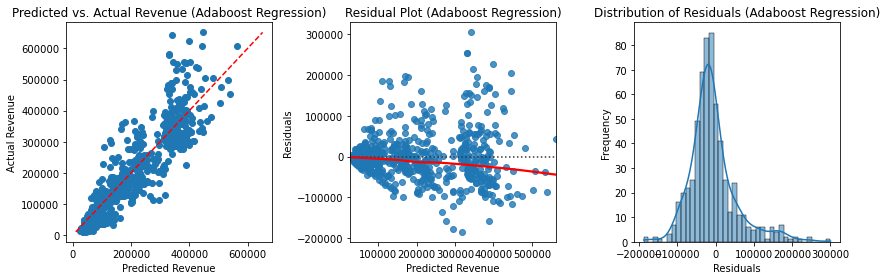

,Model,Train RMSE,Test RMSE,Train MAE,Test MAE,Train R^2,Test R^2
0,Adaboost Regression,23607.3992,62457.7085,18924.6704,44983.0323,0.975,0.8108


In [58]:
evaluate_model(best_ab_model, X_train, y_train, X_test, y_test, 'Adaboost Regression')

### XGBoost Regressor

XGBoost (Extreme Gradient Boosting) Regressor is an advanced implementation of gradient boosting algorithms. It's renowned for its efficiency, speed, and accuracy in handling large datasets and complex relationships.

XGBoost works by sequentially adding decision trees to an ensemble model, with each subsequent tree correcting the errors of its predecessors. It utilizes a technique called gradient boosting, where each tree is trained to predict the residuals (the differences between the predicted and actual values) of the previous trees. By combining multiple weak learners (individual decision trees), XGBoost creates a robust model capable of capturing intricate patterns and making highly accurate predictions.

In essence, XGBoost Regressor excels in minimizing prediction errors by iteratively improving the model's performance through the optimization of a predefined objective function, making it a powerful tool for regression tasks.

In [59]:
# Update the final pipeline's last step to use XGBoost Regressor with a fixed random state
final_pipe.steps[-1] = ('model', XGBRegressor(random_state=42))
final_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer()),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'MINIMUM_STAY', 'Available_Nights', 'Cleaning_Fee'],
      dtype='object')),
                                                 ('nom...
                              importance_type='gain',
                              interaction_constraints=None, learning_rate=None,
                              max_delta_step=None, max_depth=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              random_state=42, reg_alpha=None, reg_lambda=None,
                              scale_pos_weight=None, subsample=None,
                              tree_method=None, validate_parameters=None,
                              verbosity=None))])

The XGBoost Regressor is showing promising results straight out of the box, with a high Train $R^2$ of 0.9682 and a Test $R^2$ of 0.7943. This indicates that the model is capturing a significant amount of the variance in the training data and is also performing well on unseen test data, suggesting that it may generalize well to new data. However, further evaluation and tuning are necessary to optimize its performance.

In [60]:
# Fit the final pipeline on the training data
final_pipe.fit(X_train, y_train)

# Print the R-squared scores for the model on the training and test sets
print(f'Baseline Train Rsquared: {round(final_pipe.score(X_train, y_train),4)}')
print(f'Baseline Test Rsquared: {round(final_pipe.score(X_test, y_test),4)}')

Baseline Train Rsquared: 0.9682
Baseline Test Rsquared: 0.7943


#### Hyperparamater Tuning with GridSearchCV

The GridSearchCV for XGBoost Regressor yielded a best cross-validation score of 0.7906. The optimal hyperparameters identified are as follows:
- Imputation strategy for missing numeric values: Median
- Maximum depth of each tree: 3
- Learning rate: 0.1
- Number of boosting rounds: 165
- Minimum loss reduction required to make a further partition (gamma): 0
- Random state: 42

In [61]:
final_pipe_grid_xgboost = {
    'preprocess__numpipe__numimputer__strategy': ["mean", "median"],  # Strategies for imputing missing numeric values
    'model__max_depth': [3, 4, 5, 6, 7],  # Maximum depth of a tree
    'model__learning_rate': [0.01, 0.1, 1.0],  # Step size shrinkage used to prevent overfitting
    'model__n_estimators': [150, 155, 160, 165],  # Number of boosting rounds
    'model__gamma': [0, 0.1, 0.2],  # Minimum loss reduction required to make a further partition
    'model__random_state': [42]  # Random state for reproducibility
}

# Perform GridSearchCV with the pipeline
gs_full_pipe_xgboost = GridSearchCV(estimator=final_pipe, param_grid=final_pipe_grid_xgboost, cv=5)
gs_full_pipe_xgboost.fit(X_train, y_train)

print(f'Best GS Score: {round(gs_full_pipe_xgboost.best_score_, 4)}')
print(f'Best Parameters: {gs_full_pipe_xgboost.best_params_}')

best_xg_model = gs_full_pipe_xgboost.best_estimator_

Best GS Score: 0.7906
Best Parameters: {'model__gamma': 0, 'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 165, 'model__random_state': 42, 'preprocess__numpipe__numimputer__strategy': 'median'}


#### Results
The XGBoost Regression model achieved a Train RMSE of 58242.4314 and a Test RMSE of 58894.794, indicating that it is able to predict revenue with reasonable accuracy. Similarly, the Train MAE of 39217.4357 and Test MAE of 41648.1486 suggest that the model's predictions are relatively close to the actual revenue values. The Train $R^2$ value of 0.848 and Test $R^2$ value of 0.8318 indicate that a significant portion of the variance in the data is captured by the model.

Comparing these results to the baseline model, we observe improvements in both Train and Test $R^2$ values, indicating that the XGBoost model performs better in explaining the variance in the data. Additionally, the Train and Test RMSE values are lower for the XGBoost model compared to the baseline model, suggesting better predictive performance and less error in revenue predictions. Similarly, the Train and Test MAE values are also lower for the XGBoost model, indicating improved accuracy in revenue predictions.

Overall, the XGBoost Regression model outperforms the baseline model across all evaluation metrics, demonstrating its effectiveness in predicting revenue for the given dataset.

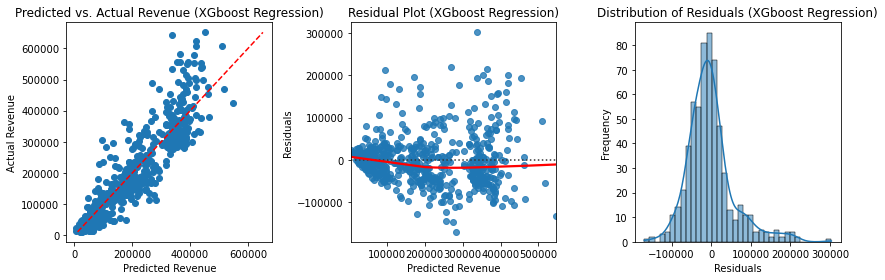

,Model,Train RMSE,Test RMSE,Train MAE,Test MAE,Train R^2,Test R^2
0,XGboost Regression,58242.4314,58894.794,39217.4357,41648.1486,0.848,0.8318


In [62]:
evaluate_model(best_xg_model, X_train, y_train, X_test, y_test, 'XGboost Regression')

### Gradient Boosting Regressor

Gradient Boosting Regressor is a machine learning algorithm used for regression tasks. It belongs to the ensemble learning methods family, specifically boosting algorithms. 

Here's how it works:

1. **Sequential Training**: Gradient Boosting Regressor builds an ensemble of weak learners sequentially. Each weak learner is trained to correct the errors made by the previous ones.

2. **Gradient Descent**: It optimizes a loss function by adding weak learners to minimize the loss. In each iteration, the algorithm fits a weak learner to the residuals (the differences between the predictions and the actual target values) of the previous iteration.

3. **Weighted Combination**: The predictions from all weak learners are combined to make the final prediction. Each weak learner's contribution is weighted based on its performance in minimizing the loss function.

The main difference between Gradient Boosting Regressor and XGBoost (Extreme Gradient Boosting) lies in their optimization techniques and additional features. XGBoost is an optimized version of Gradient Boosting that includes several enhancements:

1. **Regularization**: XGBoost includes L1 and L2 regularization terms in its objective function to control overfitting.

2. **Parallel Processing**: XGBoost can leverage parallel processing and distributed computing, making it faster and more scalable than Gradient Boosting Regressor.

3. **Tree Pruning and Cross-Validation**: XGBoost includes features such as tree pruning and built-in cross-validation capabilities, allowing for more robust model training and evaluation.


In [63]:
# Set the final step of the pipeline to use GradientBoostingRegressor as the model
final_pipe.steps[-1] = ('model', GradientBoostingRegressor(random_state=42))
final_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer()),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'MINIMUM_STAY', 'Available_Nights', 'Cleaning_Fee'],
      dtype='object')),
                                                 ('nom...
                                                                                              'Wyoming',
                                                                                              'Vermont',
                                                                                              'Washington',
                                                                                              'Pennsylvania',
                                                                                              'Florida',
                                                                                              'Missouri',
                                                                                              'New '
                                                                                              'Hampshire',
                                                                                              'Idaho',
                                                                                              'Georgia',
                                                                                              'Oregon',
                                                                                              'Maryland',
                                                                                              'Maine',
                                                                                              'Oklahoma',
                                                                                              'New '
                                                                                              'Mexico',
                                                                                              'Texas',
                                                                                              'South '
                                                                                              'Carolina',
                                                                                              'Arkansas',
                                                                                              'West '
                                                                                              'Virginia',
                                                                                              'South '
                                                                                              'Dakota']],
                                                                                 drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['STATE_NAME'])])),
                ('model', GradientBoostingRegressor(random_state=42))])

The baseline train $R^2$ score is 0.8396, indicating that the model explains approximately 83.96% of the variance in the training data. The baseline test $R^2$ score is 0.8289, suggesting that the model performs well on unseen data, explaining around 82.89% of the variance in the test dataset. These results indicate that the model generalizes well to new data, as the test score is close to the train score.


In [64]:
# Fit the final pipeline on the training data
final_pipe.fit(X_train, y_train)

# Print the R-squared scores for the model on the training and test sets
print(f'Baseline Train Rsquared: {round(final_pipe.score(X_train, y_train),4)}')
print(f'Baseline Test Rsquared: {round(final_pipe.score(X_test, y_test),4)}')

Baseline Train Rsquared: 0.8396
Baseline Test Rsquared: 0.8289


#### Hyperparamater Tuning with GridSearchCV

The Gradient Boosting Regressor model achieved a best grid search score (GS Score) of 0.7942. After hyperparameter tuning, the best parameters for the model were found to be:
- Learning rate: 0.1
- Maximum features: 'auto'
- Minimum samples leaf: 4
- Minimum samples split: 4
- Number of estimators: 250
- Imputation strategy for numeric pipeline: 'median'

This indicates that the model performed well in terms of the evaluation metric used during cross-validation. The learning rate of 0.1 suggests that each tree's contribution is reduced moderately during boosting, helping prevent overfitting. The chosen number of estimators (250) and other hyperparameters balance model complexity and performance effectively. Overall, the Gradient Boosting Regressor appears to be a promising model for this dataset.


In [65]:
# Define the grid of hyperparameters for the GradientBoostingRegressor pipeline
final_pipe_grid_gbr = {
    'preprocess__numpipe__numimputer__strategy': ["mean", "median"],  # Strategies for imputing missing numeric values
    'model__n_estimators': [150, 200, 250],  # Number of boosting stages to be run
    'model__learning_rate': [0.01, 0.1, 0.2],  # Learning rate shrinks the contribution of each tree
    'model__min_samples_split': [4, 5, 6, 7],  # Minimum number of samples required to split a node
    'model__min_samples_leaf': [3, 4, 5],  # Minimum number of samples required to be at a leaf node
    'model__max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Perform GridSearchCV with the pipeline
gs_full_pipe_gbr = GridSearchCV(estimator=final_pipe, param_grid=final_pipe_grid_gbr, cv=5)
gs_full_pipe_gbr.fit(X_train, y_train)

# Print the best cross-validation score obtained during the grid search
print(f'Best GS Score: {round(gs_full_pipe_gbr.best_score_, 4)}')

# Print the best parameters found during the grid search
print(f'Best Parameters: {gs_full_pipe_gbr.best_params_}')

# Get the best model estimator based on the grid search results
best_gbr_model = gs_full_pipe_gbr.best_estimator_

Best GS Score: 0.7942
Best Parameters: {'model__learning_rate': 0.1, 'model__max_features': 'auto', 'model__min_samples_leaf': 4, 'model__min_samples_split': 4, 'model__n_estimators': 250, 'preprocess__numpipe__numimputer__strategy': 'median'}


#### Results

The Gradient Boosting Regression model, after hyperparameter tuning, achieved impressive performance. It obtained a train RMSE of 55043.54 and a test RMSE of 57730.83, indicating a reasonable fit to the data. The model's train MAE was 36787.50, while its test MAE was 40988.37. Additionally, the R-squared values for the train and test sets were 0.8643 and 0.8384, respectively.

Comparing these results to the baseline model, we observe a significant improvement in both train and test R-squared values, indicating better explanatory power and generalization capability of the Gradient Boosting Regression model. Therefore, it can be concluded that the Gradient Boosting Regression model is the best-performing model so far for this dataset.

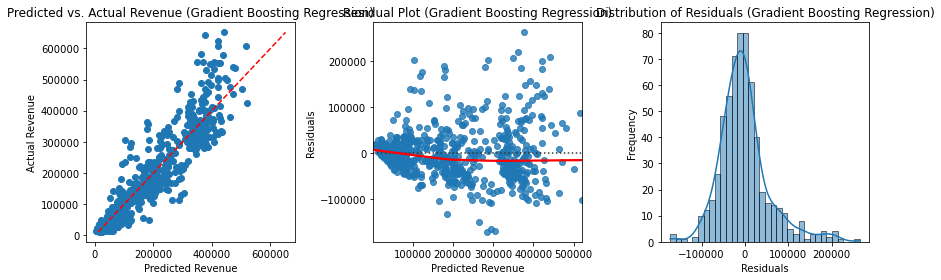

,Model,Train RMSE,Test RMSE,Train MAE,Test MAE,Train R^2,Test R^2
0,Gradient Boosting Regression,55043.5355,57730.8274,36787.496,40988.365,0.8643,0.8384


In [66]:
evaluate_model(best_gbr_model, X_train, y_train, X_test, y_test, 'Gradient Boosting Regression')

### Elastic Net Regression

Elastic Net Regression is a combination of Lasso and Ridge regression techniques, aimed at addressing their individual limitations. It uses both L1 (lasso) and L2 (ridge) penalties to minimize the loss function, promoting feature selection and handling multicollinearity simultaneously. By tuning hyperparameters, it balances between the two penalties, offering flexibility and robustness in high-dimensional datasets with correlated features.

In [67]:
# Set ElasticNet Regression as the final model in the pipeline with a specified random state
final_pipe.steps[-1] = ('model', ElasticNet(random_state=42))
final_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer()),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'MINIMUM_STAY', 'Available_Nights', 'Cleaning_Fee'],
      dtype='object')),
                                                 ('nom...
                                                                                              'Arizona',
                                                                                              'Wyoming',
                                                                                              'Vermont',
                                                                                              'Washington',
                                                                                              'Pennsylvania',
                                                                                              'Florida',
                                                                                              'Missouri',
                                                                                              'New '
                                                                                              'Hampshire',
                                                                                              'Idaho',
                                                                                              'Georgia',
                                                                                              'Oregon',
                                                                                              'Maryland',
                                                                                              'Maine',
                                                                                              'Oklahoma',
                                                                                              'New '
                                                                                              'Mexico',
                                                                                              'Texas',
                                                                                              'South '
                                                                                              'Carolina',
                                                                                              'Arkansas',
                                                                                              'West '
                                                                                              'Virginia',
                                                                                              'South '
                                                                                              'Dakota']],
                                                                                 drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['STATE_NAME'])])),
                ('model', ElasticNet(random_state=42))])

The Elastic Net Regressor has achieved a Baseline Train R-squared of 0.6387 and a Baseline Test R-squared of 0.6429. This indicates that the model's performance on the training set is slightly better than on the test set, suggesting a slight overfitting. However, the R-squared values are relatively close, indicating that the model is performing consistently on both sets, although not with high accuracy.

In [68]:
# Fit the final pipeline on the training data
final_pipe.fit(X_train, y_train)

# Print the R-squared scores for the model on the training and test sets
print(f'Baseline Train Rsquared: {round(final_pipe.score(X_train, y_train),4)}')
print(f'Baseline Test Rsquared: {round(final_pipe.score(X_test, y_test),4)}')

Baseline Train Rsquared: 0.6387
Baseline Test Rsquared: 0.6429


#### Hyperparamater Tuning with GridSearchCV
The best cross-validation score obtained during the grid search for the Elastic Net Regressor model is 0.6714. This score indicates the model's performance on unseen data. The best parameters found during the grid search are as follows:

- `alpha`: 0.1
- `l1_ratio`: 0.9
- `fit_intercept`: True
- `random_state`: 42
- `preprocess__numpipe__numimputer__strategy`: 'mean'

These parameters are selected based on their performance in optimizing the model's predictive capability. The `alpha` parameter controls the regularization strength, balancing between fitting the data well and avoiding overfitting. The `l1_ratio` parameter specifies the mixing parameter between L1 and L2 regularization. The `fit_intercept` parameter determines whether to fit an intercept for the model. Finally, the `random_state` parameter ensures reproducibility, and the strategy for imputing missing numeric values is set to 'mean'.

In [69]:
# Define the grid of hyperparameters for the Elastic Net Regressor pipeline
final_pipe_grid_enr = {
    'preprocess__numpipe__numimputer__strategy': ["mean", "median"],  # Strategies for imputing missing numeric values
    'model__alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],  # Regularization parameter
    'model__l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],  # Mixing parameter
    'model__fit_intercept': [True, False],  # Whether to fit an intercept
    'model__random_state': [42]  # Random state for reproducibility
}

# Perform GridSearchCV with the pipeline
gs_full_pipe_enr = GridSearchCV(estimator=final_pipe, param_grid=final_pipe_grid_enr, cv=5)
gs_full_pipe_enr.fit(X_train, y_train)

# Print the best cross-validation score obtained during the grid search
print(f'Best GS Score: {round(gs_full_pipe_enr.best_score_, 4)}')

# Print the best parameters found during the grid search
print(f'Best Parameters: {gs_full_pipe_enr.best_params_}')

# Get the best model estimator based on the grid search results
best_enr_model = gs_full_pipe_enr.best_estimator_

Best GS Score: 0.6714
Best Parameters: {'model__alpha': 0.1, 'model__fit_intercept': True, 'model__l1_ratio': 0.9, 'model__random_state': 42, 'preprocess__numpipe__numimputer__strategy': 'mean'}


#### Results

Comparing these results to the baseline model:

- The test RMSE and MAE are lower, indicating improved prediction accuracy.
- The test $R^2$ is slightly higher, suggesting that the Elastic Net Regression model explains more variance in the test data compared to the baseline model.

However, these improvements are moderate, and further optimization or exploration of other models may be warranted to enhance predictive performance.

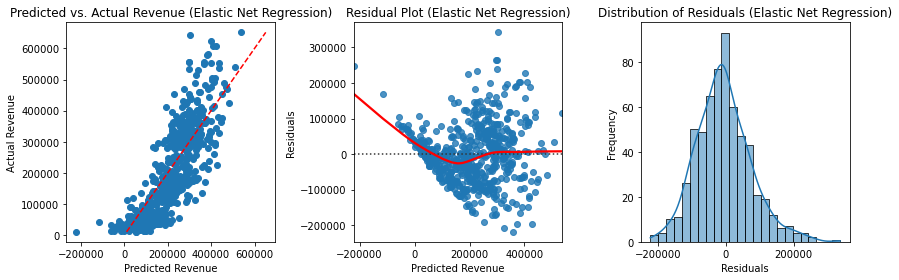

,Model,Train RMSE,Test RMSE,Train MAE,Test MAE,Train R^2,Test R^2
0,Elastic Net Regression,84571.7867,80862.9172,62955.5235,62401.8211,0.6796,0.6829


In [70]:
evaluate_model(best_enr_model, X_train, y_train, X_test, y_test, 'Elastic Net Regression')

### Support Vector Regression

Support Vector Regression (SVR) is a supervised regression algorithm that finds the hyperplane best fitting the data points while maximizing the margin, controlled by a hyperparameter called epsilon. It handles non-linear relationships using kernel functions, such as polynomial or radial basis function (RBF). SVR is effective for both linear and non-linear regression tasks, providing robust predictions even in complex or non-linear relationships.

In [71]:
# Set the final step of the pipeline to SVR model
final_pipe.steps[-1] = ('model', SVR())
final_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer()),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'MINIMUM_STAY', 'Available_Nights', 'Cleaning_Fee'],
      dtype='object')),
                                                 ('nom...
                                                                                              'Carolina',
                                                                                              'Massachusetts',
                                                                                              'Arizona',
                                                                                              'Wyoming',
                                                                                              'Vermont',
                                                                                              'Washington',
                                                                                              'Pennsylvania',
                                                                                              'Florida',
                                                                                              'Missouri',
                                                                                              'New '
                                                                                              'Hampshire',
                                                                                              'Idaho',
                                                                                              'Georgia',
                                                                                              'Oregon',
                                                                                              'Maryland',
                                                                                              'Maine',
                                                                                              'Oklahoma',
                                                                                              'New '
                                                                                              'Mexico',
                                                                                              'Texas',
                                                                                              'South '
                                                                                              'Carolina',
                                                                                              'Arkansas',
                                                                                              'West '
                                                                                              'Virginia',
                                                                                              'South '
                                                                                              'Dakota']],
                                                                                 drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['STATE_NAME'])])),
                ('model', SVR())])

The baseline train and test R-squared values for SVR are both negative, indicating that the model performs worse than a horizontal line fitting the data. This suggests that the SVR model, as configured out of the box, does not capture the relationship between the features and the target variable well.

In [72]:
# Fit the final pipeline on the training data
final_pipe.fit(X_train, y_train)

# Print the R-squared scores for the model on the training and test sets
print(f'Baseline Train Rsquared: {round(final_pipe.score(X_train, y_train),4)}')
print(f'Baseline Test Rsquared: {round(final_pipe.score(X_test, y_test),4)}')

Baseline Train Rsquared: -0.0392
Baseline Test Rsquared: -0.0192


#### Hyperparamater Tuning with GridSearchCV

The grid search for Support Vector Regression (SVR) yielded a best cross-validation score of 0.3035, indicating poor performance compared to other models. The best parameters selected were a regularization parameter (C) of 10, a kernel coefficient (gamma) of 'scale', and a linear kernel function. The strategy for imputing missing numeric values was 'mean'. Despite these parameter selections, the model's performance remains unsatisfactory, suggesting that SVR might not be well-suited for this dataset or problem.

In [73]:
final_pipe_grid_svr = {
    'preprocess__numpipe__numimputer__strategy': ["mean", "median"],  # Strategies for imputing missing numeric values
    'model__kernel': ['linear', 'rbf', 'sigmoid'],  # Kernel function options: linear, radial basis function (RBF), sigmoid
    'model__C': [0.1, 0.5, 1, 3, 4, 5, 6, 7, 8, 9, 10],  # Regularization parameter values
    'model__gamma': ['scale', 'auto']  # Kernel coefficient options for RBF kernel
}

# Instantiate the grid search cross-validation object with the pipeline and parameter grid
gs_full_pipe_svr = GridSearchCV(estimator=final_pipe, param_grid=final_pipe_grid_svr, cv=5)

# Fit the grid search object to the training data
gs_full_pipe_svr.fit(X_train, y_train)

# Print the best cross-validation score obtained during the grid search
print(f'Best GS Score: {round(gs_full_pipe_svr.best_score_, 4)}')

# Print the best parameters found during the grid search
print(f'Best Parameters: {gs_full_pipe_svr.best_params_}')

# Get the best model estimator based on the grid search results
best_svr_model = gs_full_pipe_svr.best_estimator_

Best GS Score: 0.3035
Best Parameters: {'model__C': 10, 'model__gamma': 'scale', 'model__kernel': 'linear', 'preprocess__numpipe__numimputer__strategy': 'mean'}


#### Results

These results indicate that the Support Vector Regression (SVR) model, even with the best parameters selected from grid search, performs poorly compared to other models. Both the train and test Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) values are quite high, suggesting significant errors in prediction. Additionally, the R-squared values for both train and test sets are low, indicating that the model explains only a small portion of the variance in the target variable.

In summary, SVR's underperformance in this problem could stem from issues related to kernel choice, sensitivity to outliers, complexity of data patterns, or scalability limitations. Experimenting with different kernel functions, handling outliers appropriately, and considering alternative models may help improve performance in regression tasks where SVR struggles.

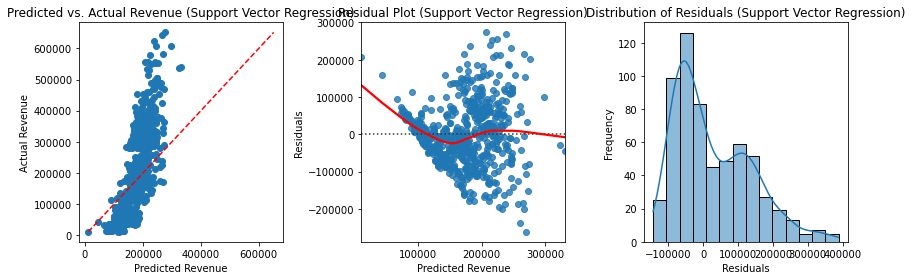

,Model,Train RMSE,Test RMSE,Train MAE,Test MAE,Train R^2,Test R^2
0,Support Vector Regression,119957.209,112391.2238,91694.3911,88257.2258,0.3554,0.3873


In [74]:
evaluate_model(best_svr_model, X_train, y_train, X_test, y_test, 'Support Vector Regression')

### StackingRegressor

A stacking regressor is an ensemble learning technique that combines the predictions of multiple base regression models to make a final prediction. It works by training several base models on the same dataset and then using the predictions of these base models as features to train a final meta-model, which makes the ultimate prediction.

In this case, I used the best three regression models that were previously tested (AdaBoost, XGBoost, and Gradient Boosting) as the base estimators for the stacking regressor. These models were chosen because they demonstrated the highest performance during testing. Additionally, I selected Linear Regression as the final estimator because it is a simple yet effective model that is suitable for combining the predictions of the base models.

In [75]:
# Define a list of tuples, each containing a name and a trained model
estimators = [
    ('ab', best_ab_model),   # AdaBoost Regressor model
    ('xg', best_xg_model),   # XGBoost Regressor model
    ('gbr', best_gbr_model)  # Gradient Boosting Regressor model
]

# Create a StackingRegressor ensemble model with the specified estimators
sr = StackingRegressor(estimators, final_estimator=LinearRegression())

In [76]:
# Fits the stacking regressor to the training data
sr.fit(X_train, y_train)

StackingRegressor(estimators=[('ab',
                               Pipeline(steps=[('preprocess',
                                                ColumnTransformer(transformers=[('numpipe',
                                                                                 Pipeline(steps=[('numimputer',
                                                                                                  SimpleImputer()),
                                                                                                 ('numnorm',
                                                                                                  StandardScaler())]),
                                                                                 Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'MINIMUM_STAY', 'Available_Nights', 'C...
                                                                                                                             'Maryland',
                                                                                                                             'Maine',
                                                                                                                             'Oklahoma',
                                                                                                                             'New '
                                                                                                                             'Mexico',
                                                                                                                             'Texas',
                                                                                                                             'South '
                                                                                                                             'Carolina',
                                                                                                                             'Arkansas',
                                                                                                                             'West '
                                                                                                                             'Virginia',
                                                                                                                             'South '
                                                                                                                             'Dakota']],
                                                                                                                drop='first',
                                                                                                                handle_unknown='ignore',
                                                                                                                sparse=False))]),
                                                                                 ['STATE_NAME'])])),
                                               ('model',
                                                GradientBoostingRegressor(max_features='auto',
                                                                          min_samples_leaf=4,
                                                                          min_samples_split=4,
                                                                          n_estimators=250,
                                                                          random_state=42))]))],
                  final_estimator=LinearRegression())

The Stacking Regressor produced a train RMSE of 42154.8041 and a test RMSE of 57924.7289, indicating that the model's predictions have an average deviation of approximately 42,154 and 57,924 from the actual values for the training and test datasets, respectively. Similarly, the train MAE is 29985.2618, suggesting an average absolute error of approximately 29,985 on the training data, while the test MAE is 40809.7492, indicating an average absolute error of approximately 40,809 on the test data. 

The stacking regressor achieved a higher $R^2$ score of 0.9204 on the training data and 0.8373 on the test data. This indicates that the model performs well in capturing the variance in the target variable for both the training and test datasets. The stacking approach, which combines predictions from multiple base models (AdaBoost, XGBoost, and Gradient Boosting), followed by a linear regression final estimator, appears to have effectively leveraged the strengths of these individual models to improve overall performance.

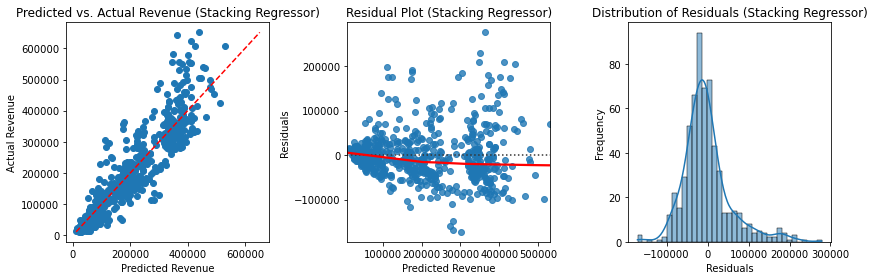

,Model,Train RMSE,Test RMSE,Train MAE,Test MAE,Train R^2,Test R^2
0,Stacking Regressor,42154.8041,57924.7289,29985.2618,40809.7492,0.9204,0.8373


In [77]:
evaluate_model(sr, X_train, y_train, X_test, y_test, 'Stacking Regressor')

### Voting Regressor

The Voting Regressor is an ensemble learning technique that combines the predictions from multiple individual regression models to produce a single aggregated prediction. It operates by averaging the predictions of its constituent models or by considering the majority vote, depending on whether it's a regression or classification problem.

In this case, I set up the Voting Regressor using the following three base estimators:
1. AdaBoost Regressor (best_ab_model)
2. XGBoost Regressor (best_xg_model)
3. Gradient Boosting Regressor (best_gbr_model)

These base estimators represent three different types of boosting algorithms that have shown promising performance individually. By combining them in the Voting Regressor, we aim to leverage the diverse strengths of each model to improve overall predictive accuracy.

The voting_regressor is initialized with the specified estimators, which will collectively contribute to the final prediction made by the Voting Regressor.


In [78]:
# Initialize the Voting Regressor with the specified estimators
voting_regressor = VotingRegressor(estimators)

In [79]:
voting_regressor.fit(X_train, y_train)

VotingRegressor(estimators=[('ab',
                             Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('numpipe',
                                                                               Pipeline(steps=[('numimputer',
                                                                                                SimpleImputer()),
                                                                                               ('numnorm',
                                                                                                StandardScaler())]),
                                                                               Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'MINIMUM_STAY', 'Available_Nights', 'Cle...
                                                                                                                           'Hampshire',
                                                                                                                           'Idaho',
                                                                                                                           'Georgia',
                                                                                                                           'Oregon',
                                                                                                                           'Maryland',
                                                                                                                           'Maine',
                                                                                                                           'Oklahoma',
                                                                                                                           'New '
                                                                                                                           'Mexico',
                                                                                                                           'Texas',
                                                                                                                           'South '
                                                                                                                           'Carolina',
                                                                                                                           'Arkansas',
                                                                                                                           'West '
                                                                                                                           'Virginia',
                                                                                                                           'South '
                                                                                                                           'Dakota']],
                                                                                                              drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse=False))]),
                                                                               ['STATE_NAME'])])),
                                             ('model',
                                              GradientBoostingRegressor(max_features='auto',
                                                                        min_samples_leaf=4,
                                                                        min_samples_split=4,
        

The Voting Regressor achieved a relatively low RMSE and MAE on both the training and test sets, indicating good predictive performance. The $R^2$ scores are also high, suggesting that the model explains a significant portion of the variance in the target variable. However, the performance is slightly lower compared to the Stacking Regressor, indicating that the ensemble of models might not be capturing the underlying patterns as effectively.

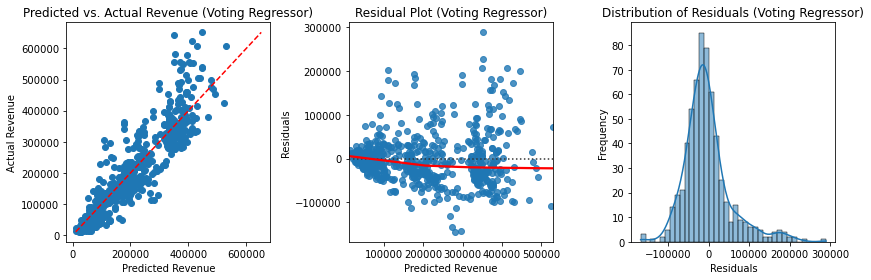

,Model,Train RMSE,Test RMSE,Train MAE,Test MAE,Train R^2,Test R^2
0,Voting Regressor,42949.7002,58297.1255,30926.1294,41383.4092,0.9174,0.8352


In [80]:
evaluate_model(voting_regressor, X_train, y_train, X_test, y_test, 'Voting Regressor')

## Conclusion

Based on the evaluation of various regression models, the Gradient Boosting Regression stands out as the top performer with the highest test $R^2$ value (0.8384) and the lowest test RMSE and MAE values among all models. This indicates that the Gradient Boosting Regression model explains a significant portion of the variance in the target variable and makes more accurate predictions compared to other models.

For Cloud 9 Cabins, this model would be incredibly valuable for making decisions regarding which properties to build next. By using the Gradient Boosting Regression model, they can predict with reasonable accuracy how much revenue they can expect from each potential property. This information can inform their investment decisions, allowing them to prioritize properties that are likely to generate higher returns.

In essence, the Gradient Boosting Regression model provides Cloud 9 Cabins with a powerful tool for optimizing their business strategy, enabling them to allocate resources more effectively and maximize profitability.

In [81]:
all_metrics_df.sort_values(by='Test R^2', ascending=False)

,Model,Train RMSE,Test RMSE,Train MAE,Test MAE,Train R^2,Test R^2
7,Gradient Boosting Regression,55043.5355,57730.8274,36787.4960,40988.3650,0.8643,0.8384
10,Stacking Regressor,42154.8041,57924.7289,29985.2618,40809.7492,0.9204,0.8373
11,Voting Regressor,42949.7002,58297.1255,30926.1294,41383.4092,0.9174,0.8352
6,XGboost Regression,58242.4314,58894.7940,39217.4357,41648.1486,0.8480,0.8318
5,Adaboost Regression,23607.3992,62457.7085,18924.6704,44983.0323,0.9750,0.8108
4,Decision Tree Regression,67132.2759,66327.0158,46220.7472,47110.5129,0.7981,0.7866
3,KNeighbors Regression,474.8732,78556.6315,21.9353,57644.6915,1.0000,0.7007
2,Lasso Regression,83545.8857,79513.7192,61891.9644,61667.7067,0.6873,0.6934
0,Linear Regression,83545.6686,79516.2759,61888.4860,61672.2107,0.6873,0.6933
1,Ridge Regression,83686.9855,79608.6407,62062.8609,61602.7549,0.6863,0.6926


### Next Steps

1. **Feature Engineering**: Explore additional features or engineer new ones that could better capture the underlying patterns in the data. This might involve incorporating external datasets, creating interaction terms, or transforming existing features to better align with the target variable.

2. **Time-Series Analysis**: Since the dataset likely contains temporal information about property rentals (e.g., dates of bookings, seasonal trends), consider incorporating time-series analysis techniques. This could involve modeling temporal patterns, detecting seasonality, and incorporating lag features to capture historical trends, which may further improve revenue predictions.

3. **Customer Segmentation**: Explore customer segmentation techniques to identify distinct groups of customers based on their booking behavior, demographics, or preferences. By understanding different customer segments, Cloud 9 Cabins can tailor their marketing strategies, pricing models, and property offerings to better meet the needs and preferences of each segment, ultimately driving revenue growth.
